<font color='red'> Note: the varibles don't have generic at the end means that it's from gap sample

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.integrate as integrate
import scipy.stats as stats

from scipy.optimize import curve_fit
from numpy.polynomial.legendre import legval
from decimal import Decimal
import statistics

from IPython.display import display, Latex, HTML
from tabulate import tabulate


form_title = {'family': 'helvetica', 'color': 'black', 'size': 15}
form_label = {'family': 'helvetica', 'color': 'black', 'size': 20}


import sys
sys.path.append('/Users/sahargholipour/Dropbox/Mac/Documents/MSc_Project/Semileptonic_Bdecay')
import fitting_funtion as Fit
import functions as func
import gap_sample_function as gap
import fitting_funtion_copy as fit
from importlib import reload
reload(fit)
reload(Fit)
reload(module=func)
reload(module=gap)

<module 'gap_sample_function' from '/Users/sahargholipour/Dropbox/Mac/Documents/MSc_Project/Semileptonic_Bdecay/gap_sample_function.py'>

# MC Luminosity

Bellow you said that you should multiply the mc_BF by 2 bc of 2 Bs, but that's wrong for cross section, you have 2 Bs which one of them decays to D**lnu but the other one is decaying generically still.

In [3]:
# BF of D2slnu
# charged
# Note: the first 2 in the equation is for electron and muon and the second 2 is for 2 Bs, also we have two modes bc D2s icludes D'_1 (0.00431) and D_0 (0.00389)
# BF_D2slnu_charged = 2 * (0.003890000 + 0.004310000) * 2
BF_D2slnu_charged = 2 * (0.002010000 + 0.002010000)
# mixed
# BF_D2slnu_mixed = 2 * (0.003620000 + 0.004010000) * 2
BF_D2slnu_mixed = 2 * (0.002170000 + 0.002170000)

# gap sample: you shouyld multiply the cross section by the BF of the modes you are have in this file, bc 1100000 is the cross section of B meson including all the modes
mcNBB_charged = 180000 * 114;  mcNBB_mixed = 182500 * 110
mcNBB = mcNBB_charged + mcNBB_mixed;   mclumi = mcNBB / (1100000. * (BF_D2slnu_charged + BF_D2slnu_mixed))
print(f'Number of BB events (sum of B+B- and B0B0) = {mcNBB:6.3e}')
print(f'MC sample equivalent to {mclumi:.2f} fb-1' + '\n')
# generic sample
mcNBB_generic = 182500 * 2. * 1393;   mclumi_generic = mcNBB_generic / 1100000.
print(f'Number of BB events in generic sample(sum of B+B- and B0B0) = {mcNBB_generic:6.3e}')
print(f'MC generic sample equivalent to {mclumi_generic:.2f} fb-1')

scale = mclumi_generic / mclumi

Number of BB events (sum of B+B- and B0B0) = 4.060e+07
MC sample equivalent to 2207.21 fb-1

Number of BB events in generic sample(sum of B+B- and B0B0) = 5.084e+08
MC generic sample equivalent to 462.22 fb-1


# Reconstructing $\eta$ modes plus side bands and Generating Modes

In [4]:
# reconstructed eta modes plus etaSB
l_eta_Bp = [1600,1700,2600,2700]
eta_rec_Bp = list(i+1 for i in l_eta_Bp) + l_eta_Bp

l_eta_B0 = [1400,1500,2400,2500]
eta_rec_B0 = list(i+1 for i in l_eta_B0) + l_eta_B0

# reconstructed D(*)lnu
l_Dl_Bp = [300,400]
Dl_rec_Bp = list(i+1 for i in l_Dl_Bp) + l_Dl_Bp

l_Dl_B0 = [100,200]
Dl_rec_B0 = list(i+1 for i in l_Dl_B0) + l_Dl_B0

# generated D(*)etalnu
eta_gen_Bp = [1019,1020,1039,1040]
eta_gen_B0 = [1017,1018,1035,1036]

# generated DDs
DDs_gen_Bp = [i+1681 for i in range(4)]
DDs_gen_B0 = [i+1833 for i in range(4)]

# generated D(*)lnu
Dl_gen_Bp = [1001, 1002, 1021, 1022]
Dl_gen_B0 = [1001, 1002, 1021, 1022]

In [5]:
# No charged particles in ROE and the Eextra_ROE should be less than one
pd.pandas.set_option('display.max_columns', None)
gap_sample = pd.read_pickle('eta_D2slnu.pkl')
generic_sample = pd.read_pickle('b2size_MC.pkl')
gap_sample

__experiment__  __run__  __event__  \
rec_charged gen_charged 0                1003        0    1576610   
                        1                1003        0    1576610   
                        2                1003        0    1576610   
                        3                1003        0    1576610   
                        4                1003        0    1576610   
...                                       ...      ...        ...   
rec_mixed   gen_mixed   50204            1003        0    3775059   
                        50205            1003        0    3775059   
                        50206            1003        0    3775059   
                        50207            1003        0    3775059   
                        50208            1003        0    3775059   

                               __production__  __candidate__  __ncandidates__  \
rec_charged gen_charged 0               26236              0                9   
                        1               26236              1                9   
                        2               26236              2                9   
                        3               26236              3                9   
                        4               26236              4                9   
...                                       ...            ...              ...   
rec_mixed   gen_mixed   50204           26226              4                9   
                        50205           26226              5                9   
                        50206           26226              6                9   
                        50207           26226              7                9   
                        50208           26226              8                9   

                               __weight__       Ecms  aBminusMode  aBplusMode  \
rec_charged gen_charged 0             1.0  10.579557      -1005.0      1021.0   
                        1             1.0  10.579557      -1005.0      1021.0   
                        2             1.0  10.579557      -1005.0      1021.0   
                        3             1.0  10.579557      -1005.0      1021.0   
                        4             1.0  10.579557      -1005.0      1021.0   
...                                   ...        ...          ...         ...   
rec_mixed   gen_mixed   50204         1.0  10.579557        -99.0       -99.0   
                        50205         1.0  10.579557        -99.0       -99.0   
                        50206         1.0  10.579557        -99.0       -99.0   
                        50207         1.0  10.579557        -99.0       -99.0   
                        50208         1.0  10.579557        -99.0       -99.0   

                                aB0Mode  aBbar0Mode  aDstminusMode  \
rec_charged gen_charged 0         -99.0       -99.0          -99.0   
                        1         -99.0       -99.0          -99.0   
                        2         -99.0       -99.0          -99.0   
                        3         -99.0       -99.0          -99.0   
                        4         -99.0       -99.0          -99.0   
...                                 ...         ...            ...   
rec_mixed   gen_mixed   50204  101004.0     -1019.0          -99.0   
                        50205  101004.0     -1019.0          -99.0   
                        50206  101004.0     -1019.0          -99.0   
                        50207  101004.0     -1019.0          -99.0   
                        50208  101004.0     -1019.0          -99.0   

                               aDstplusMode  aDminusMode  aDplusMode  aD0Mode  \
rec_charged gen_charged 0             -99.0        -99.0       -99.0   1032.0   
                        1             -99.0        -99.0       -99.0   1032.0   
                        2             -99.0        -99.0       -99.0   1032.0   
                        3             -99.0        -99.0       -99.0   1032.0   
          

In [7]:
func.genMode_frequency(gap_sample.loc['rec_charged'])

--------------------------------------------- Reconstructed:  BmBp -----------------------------------------
--------------------------------------------- Generated:  BmBp ---------------------------------------------
╒═════╤══════════════════════════════╤═════════════╕   ╒═════╤══════════════════════════════╤═════════════╕
│     │  Generated B- Decay Mode ID  │  Frequency  │   │     │  Generated B+ Decay Mode ID  │  Frequency  │
╞═════╪══════════════════════════════╪═════════════╡   ╞═════╪══════════════════════════════╪═════════════╡
│  0  │            -1021             │    6540     │   │  0  │             1021             │    6095     │
├─────┼──────────────────────────────┼─────────────┤   ├─────┼──────────────────────────────┼─────────────┤
│  1  │            -1025             │    5517     │   │  1  │             1025             │    5592     │
├─────┼──────────────────────────────┼─────────────┤   ├─────┼──────────────────────────────┼─────────────┤
│  2  │            -1024  

In [8]:
gap_sample.loc['rec_charged'].query('pi4_B0_mcPDG==221 and pi4_B0_isSignal==1')['pi4_B0_genMotherPDG_0'].value_counts()

 20423.0    2071
 10421.0    1660
-20423.0     445
-10421.0     357
 20413.0      47
-521.0        45
-20413.0      43
-10411.0      36
-431.0        27
 10411.0      17
 421.0        13
 521.0        11
-511.0         6
 431.0         4
-421.0         2
Name: pi4_B0_genMotherPDG_0, dtype: int64

In [9]:
generic_sample

__experiment__  __run__  __event__  \
rec_charged gen_charged 0                 1003        0    8640457   
                        1                 1003        0    8640457   
                        2                 1003        0    8640457   
                        12                1003        0   12624230   
                        13                1003        0   12624230   
...                                        ...      ...        ...   
rec_mixed   gen_mixed   217135            1003        0    6391035   
                        217136            1003        0    6391035   
                        217137            1003        0    6391035   
                        217138            1003        0    6391035   
                        217139            1003        0    6391035   

                                __production__  __candidate__  \
rec_charged gen_charged 0                24816              0   
                        1                24816              1   
                        2                24816              2   
                        12               24816              0   
                        13               24816              1   
...                                        ...            ...   
rec_mixed   gen_mixed   217135           24825              4   
                        217136           24825              5   
                        217137           24825              6   
                        217138           24825              7   
                        217139           24825              8   

                                __ncandidates__  __weight__       Ecms  \
rec_charged gen_charged 0                     3         1.0  10.579557   
                        1                     3         1.0  10.579557   
                        2                     3         1.0  10.579557   
                        12                    9         1.0  10.579557   
                        13                    9         1.0  10.579557   
...                                         ...         ...        ...   
rec_mixed   gen_mixed   217135                9         1.0  10.579557   
                        217136                9         1.0  10.579557   
                        217137                9         1.0  10.579557   
                        217138                9         1.0  10.579557   
                        217139                9         1.0  10.579557   

                                aBminusMode  aBplusMode  aB0Mode  aBbar0Mode  \
rec_charged gen_charged 0         -101002.0      1021.0    -99.0       -99.0   
                        1         -101002.0      1021.0    -99.0       -99.0   
                        2         -101002.0      1021.0    -99.0       -99.0   
                        12        -101001.0      1022.0    -99.0       -99.0   
                        13        -101001.0      1022.0    -99.0       -99.0   
...                                     ...         ...      ...         ...   
rec_mixed   gen_mixed   217135        -99.0       -99.0   1929.0    101019.0   
                        217136        -99.0       -99.0   1929.0    101019.0   
                        217137        -99.0       -99.0   1929.0    101019.0   
                        217138        -99.0       -99.0   1929.0    101019.0   
                        217139        -99.0       -99.0   1929.0    101019.0   

                                aDstminusMode  aDstplusMode  aDminusMode  \
rec_charged gen_charged 0               -99.0         -99.0        -99.0   
                        1               -99.0         -99.0        -99.0   
                        2               -99.0         -99.0        -99.0   
                        12              -99.0         -99.0        -99.0   
                        13              -99.0         -99.0        -99.0   
...                                       ...           ...          ...   
rec_mixed   gen_mixed   2171

In [10]:
gap_sample.reset_index(drop=True)

__experiment__  __run__  __event__  __production__  __candidate__  \
0                1003        0    1576610           26236              0   
1                1003        0    1576610           26236              1   
2                1003        0    1576610           26236              2   
3                1003        0    1576610           26236              3   
4                1003        0    1576610           26236              4   
...               ...      ...        ...             ...            ...   
70192            1003        0    3775059           26226              4   
70193            1003        0    3775059           26226              5   
70194            1003        0    3775059           26226              6   
70195            1003        0    3775059           26226              7   
70196            1003        0    3775059           26226              8   

       __ncandidates__  __weight__       Ecms  aBminusMode  aBplusMode  \
0                    9         1.0  10.579557      -1005.0      1021.0   
1                    9         1.0  10.579557      -1005.0      1021.0   
2                    9         1.0  10.579557      -1005.0      1021.0   
3                    9         1.0  10.579557      -1005.0      1021.0   
4                    9         1.0  10.579557      -1005.0      1021.0   
...                ...         ...        ...          ...         ...   
70192                9         1.0  10.579557        -99.0       -99.0   
70193                9         1.0  10.579557        -99.0       -99.0   
70194                9         1.0  10.579557        -99.0       -99.0   
70195                9         1.0  10.579557        -99.0       -99.0   
70196                9         1.0  10.579557        -99.0       -99.0   

        aB0Mode  aBbar0Mode  aDstminusMode  aDstplusMode  aDminusMode  \
0         -99.0       -99.0          -99.0         -99.0        -99.0   
1         -99.0       -99.0          -99.0         -99.0        -99.0   
2         -99.0       -99.0          -99.0         -99.0        -99.0   
3         -99.0       -99.0          -99.0         -99.0        -99.0   
4         -99.0       -99.0          -99.0         -99.0        -99.0   
...         ...         ...            ...           ...          ...   
70192  101004.0     -1019.0          -99.0        1002.0      -1033.0   
70193  101004.0     -1019.0          -99.0        1002.0      -1033.0   
70194  101004.0     -1019.0          -99.0        1002.0      -1033.0   
70195  101004.0     -1019.0          -99.0        1002.0      -1033.0   
70196  101004.0     -1019.0          -99.0        1002.0      -1033.0   

       aDplusMode  aD0Mode  aDbar0Mode       ECM       pCM      InvM  \
0           -99.0   1032.0     -1010.0  8.457257  1.708066  8.286616   
1           -99.0   1032.0     -1010.0  8.418423  1.697509  8.245027   
2           -99.0   1032.0     -1010.0  7.982515  1.544821  7.831093   
3           -99.0   1032.0     -1010.0  8.531342  1.642616  8.371780   
4           -99.0   1032.0     -1010.0  8.211887  1.564090  8.061070   
...           ...      ...         ...       ...       ...       ...   
70192      1033.0    -99.0       -99.0  8.432978  1.985877  8.195914   
70193      1033.0    -99.0       -99.0  8.609262  2.023396  8.366407   
70194      1033.0    -99.0       -99.0  8.440657  1.888054  8.225348   
70195      1033.0    -99.0       -99.0  8.342682  1.953904  8.109891   
70196      1033.0    -99.0       -99.0  8.501390  1.939372  8.276232   

        cosThCM     phiCM     PDG  nROE_Ch  nROE_ECL  nROE_KL  nROE_gam  \
0     -0.710751 -2.338608  300553      0.0       3.0      1.0       3.0   
1     -0.726665 -2.347948  300553      0.0       3.0      1.0       3.0   
2     -0.968130 -1.333682  300553      0.0       2.0      1.0       2.0   
3     -0.739381 -2.430072  300553      0.0       2.0      1.0       2.0   
4     -0.680694 -2.253248  300553      0.0       4.0      1.0       4.0   
...         .

In [6]:
# gap sample
# taking only reconstructed charged BBbar
# charged_df = gap_sample.loc['rec_charged'].reset_index(drop=True)
charged_df = gap_sample.loc['rec_charged']
# reconstructing one B as Dlnu one as Detalnu
eta_df_BmBp = charged_df.query(
    f'( ((B0_decayModeID=={eta_rec_Bp}) & (B1_decayModeID=={Dl_rec_Bp})) | ((B1_decayModeID=={eta_rec_Bp}) & (B0_decayModeID=={Dl_rec_Bp})) )'
)
# min candidates in each event
eta_df_BmBp_mincans, _ = Fit.bestcan(eta_df_BmBp)

In [7]:
# generic smaple
# taking only reconstructed charged BBbar
charged_df_generic = generic_sample.loc['rec_charged']
# reconstructing one B as Dlnu one as Detalnu
eta_df_BmBp_generic = charged_df_generic.query(
    f'( ((B0_decayModeID=={eta_rec_Bp}) & (B1_decayModeID=={Dl_rec_Bp})) | ((B1_decayModeID=={eta_rec_Bp}) & (B0_decayModeID=={Dl_rec_Bp})) )'
)
# min candidates in each event
eta_df_BmBp_mincans_generic, _ = Fit.bestcan(eta_df_BmBp_generic)

In [8]:
print('length of BpBm generated and BpBm reconstructed: ', len(charged_df.loc['gen_charged']))
print('length of B0B0bar generated and BpBm reconstructed: ', len(charged_df.loc['gen_mixed']))
print('sum of charged and mixed generated: ', len(charged_df.loc['gen_charged'])+len(charged_df.loc['gen_mixed']))
print('length of the data set after taking the min candidate: ', len(eta_df_BmBp_mincans))

length of BpBm generated and BpBm reconstructed:  45715
length of B0B0bar generated and BpBm reconstructed:  2451
sum of charged and mixed generated:  48166
length of the data set after taking the min candidate:  3802


## Splitting the signal and background

In [8]:
# gap sample
eta_df_sig, eta_df_bkg = gap.sig_bkg_spliter(eta_df_BmBp_mincans, 'charged')

In [9]:
# generic sample
eta_df_sigpkg_generic, eta_df_ckg_generic, eta_df_sig_generic, eta_df_bkg_generic, eta_df_pkg_generic = Fit.sig_bkg_spliter(
    eta_df_BmBp_mincans_generic, 'charged', 'charged', 'charged', full_output=True)

In [16]:
func.genMode_frequency_B1_basedon_B0(eta_df_bkg)

-------------------------- Reconstructed:  BmBp ---------------------
-------------------------- Generated:  BmBp -------------------------
╒════╤═════════════════════════════════════════╤═════════════════════════════════════════╕
│    │  Generated B+ Decay Mode ID: Frequency  │  Generated B- Decay Mode ID: Frequency  │
╞════╪═════════════════════════════════════════╪═════════════════════════════════════════╡
│ 0  │               1021.0: 255               │               -1025.0: 53               │
│    │                                         │               -1024.0: 52               │
│    │                                         │               -1005.0: 39               │
│    │                                         │               -1004.0: 37               │
│    │                                         │              -101005.0: 27              │
│    │                                         │              -101004.0: 16              │
│    │                                   

In [17]:
len(eta_df_sig)*mclumi_generic / mclumi

362.9161298977707

### Let's plot the sig and background stacked

No zero in signal+noise bin_counts list
[ 12.  10.  13.  20.  35.  44.  51.  84. 143. 227. 336. 345. 222.  94.
  56.  14.   8.   6.   5.   6.   1.]


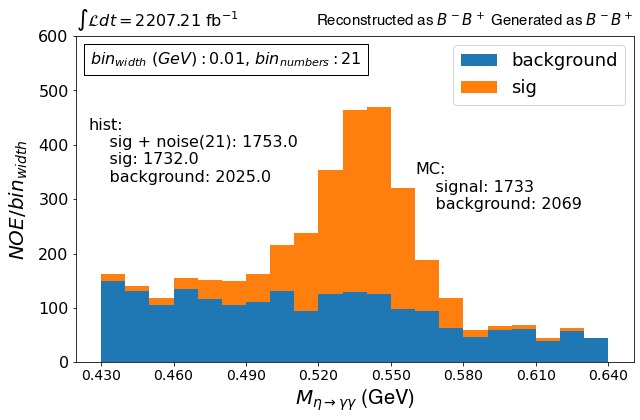

In [18]:
# sig here means signal + peaking background
eta_x, eta_y_sig, eta_y_bkg, eta_bin_count = Fit.plot_sigbkg_InvM_hist(df_background=eta_df_bkg, df_signal=eta_df_sig, signal_label='sig',y_axis_sapce=600, flat_bkg=True, scale=(1, 1))
plt.title(r'Reconstructed as $B^-B^+$ Generated as $B^-B^+$',
          loc='right', pad=10, fontdict=form_title)
plt.text(.425,300, f"""hist:
    sig + noise(21): {np.sum(eta_y_sig):.1f}
    sig: {np.sum(eta_bin_count[1]-eta_bin_count[0])}
    background: {np.sum(eta_y_bkg)}
""", fontsize=16)
# plt.text(0.55, 110, '-'*30, rotation=90)
plt.text(0.56,250, f"""MC:
    signal: {len(eta_df_sig)}
    background: {len(eta_df_bkg)}
""", fontsize=16)

text = '$\int \mathcal{L} dt = $' + f'{mclumi:.2f}' + r' fb$^{-1}$'
plt.annotate(text, xy=(0, 1.01), 
             fontsize=16,
             xycoords='axes fraction',
             horizontalalignment='left',
             verticalalignment='bottom')

print(eta_bin_count[1]-eta_bin_count[0])

plt.show()

<function fitting_sig_bkg.<locals>.<lambda> at 0x13c2de670>


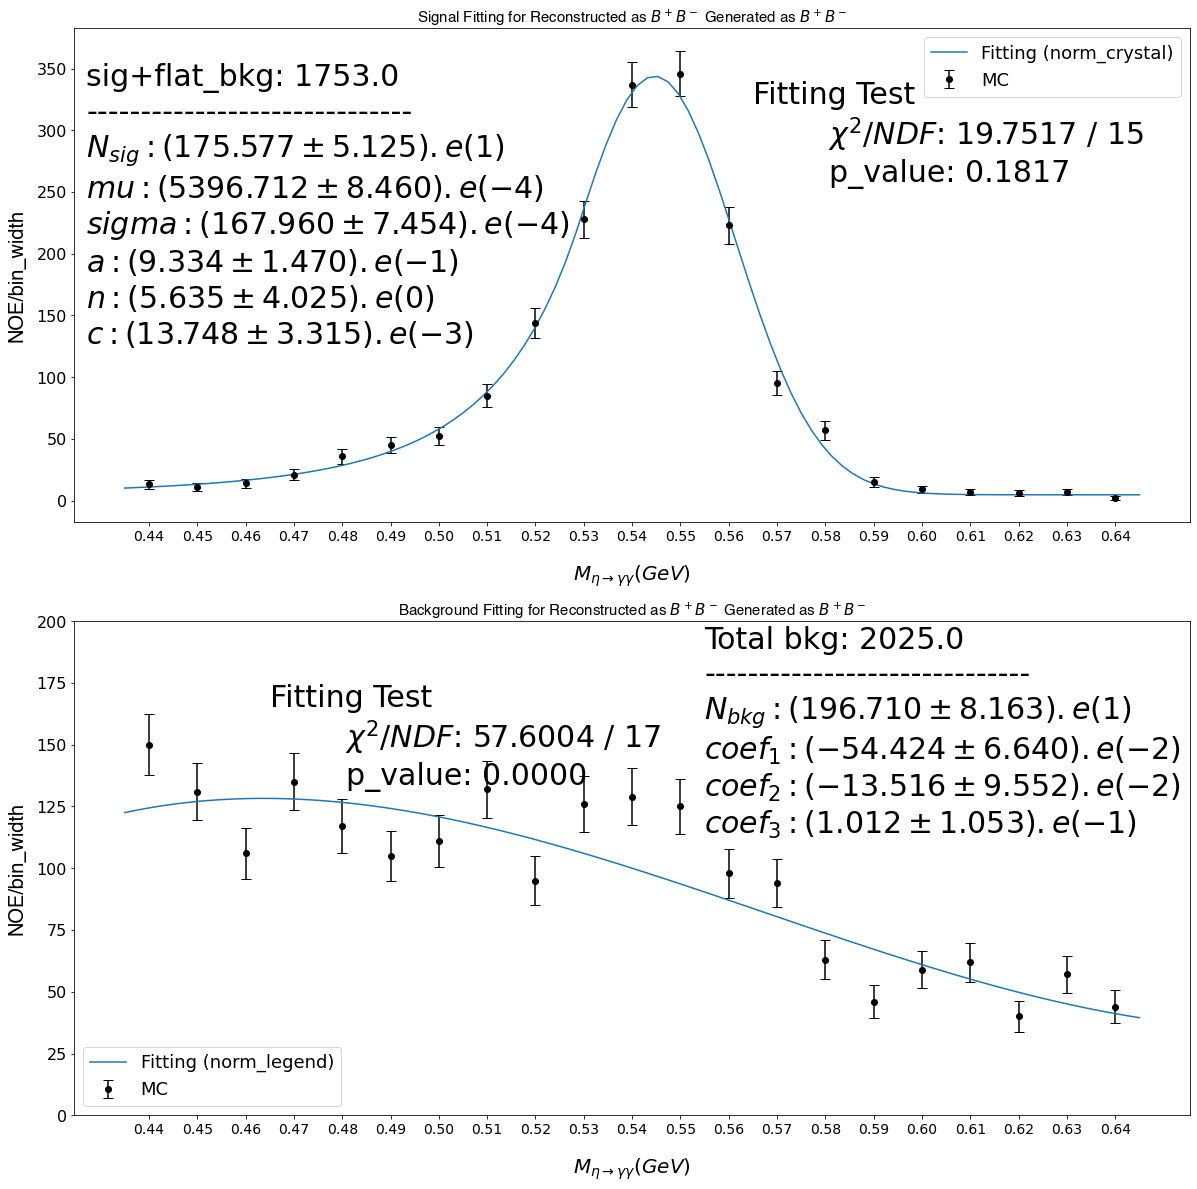

In [19]:
# bound_bkg = ([-np.inf, 0, -1, -1],[np.inf, 10, np.inf, np.inf])
result = fit.fitting_sig_bkg('B^+B^-', 'B^+B^-', eta_x, eta_y_sig, eta_y_bkg, param_text_location_sig=(0.422, 100), param_text_location_bkg=(0.55, 100), max_ylim_bkg=200, bkg_func=fit.norm_legend)

N_sig + N_bkg       Sum of sig + bkg entries         difference
3761                         3757                      4.625


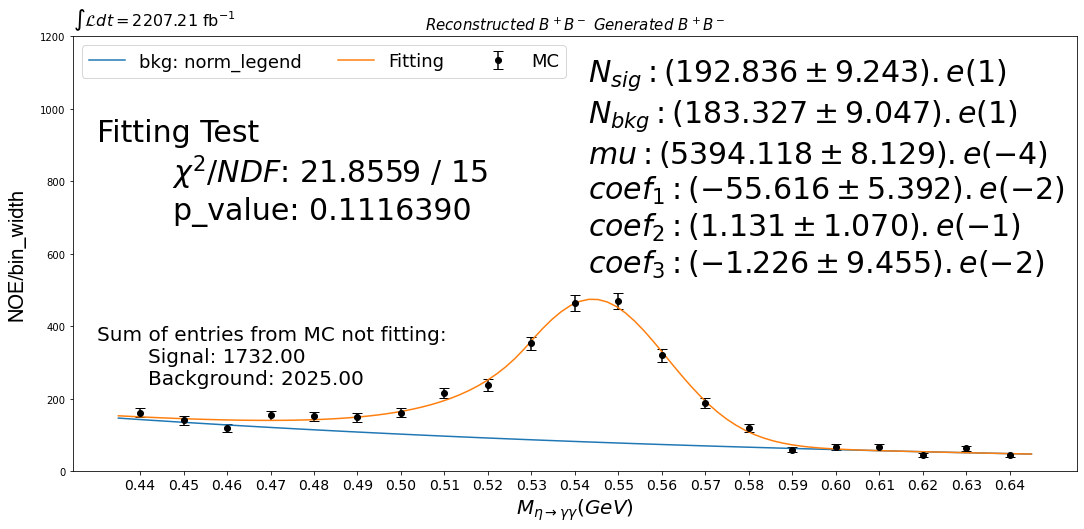

signal 1928.3573719773813 92.42656304451462
backgroudn 1833.2676870891446 90.47119213279518


In [23]:
p0 = [3.56, 67.39, 0.54, -.76, 0.21, -.08]
bounds = [[0, 0, 0, -2, -2, -2],[30, 100, 0.56, 2, 2, 2]]
result_mucoefs_float = Fit.fitting_sig_plus_bkg(
    eta_x, eta_bin_count, result, 'MC', mclumi, text_params_position=(0.538, 450), max_ylim=1200, legend_loc='upper left', bounds=bounds, bkg_func=Fit.norm_legend, float_mu_legendre=True, MC_info_loc=(0.425, 180), fitting_info_loc=(0.425, 600)
    )

print('signal', result_mucoefs_float['params'][0], result_mucoefs_float['uncertainty'][0])
print('backgroudn', result_mucoefs_float['params'][1], result_mucoefs_float['uncertainty'][1])


No zero in signal+noise bin_counts list
[ 12.  10.  13.  20.  35.  44.  51.  84. 143. 227. 336. 345. 222.  94.
  56.  14.   8.   6.   5.   6.   1.]


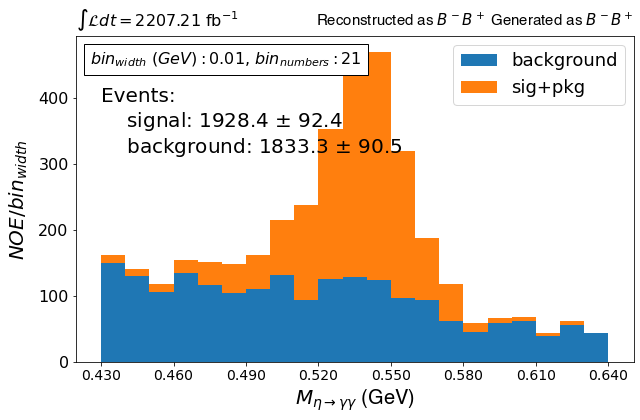

In [25]:
# sig here means signal + peaking background
eta_x, eta_y_sig, eta_y_bkg, eta_bin_count = Fit.plot_sigbkg_InvM_hist(eta_df_bkg, eta_df_sig, 'sig+pkg',600, flat_bkg=True, scale=(1, 1))
plt.title(r'Reconstructed as $B^-B^+$ Generated as $B^-B^+$',
          loc='right', pad=10, fontdict=form_title)

sig_text = f"{result_mucoefs_float['params'][0]:.1f} $\pm$ {result_mucoefs_float['uncertainty'][0]:.1f}"
bkg_text = f"{result_mucoefs_float['params'][1]:.1f} $\pm$ {result_mucoefs_float['uncertainty'][1]:.1f}"
plt.text(0.43,280, f"""Events:
    signal: {sig_text}
    background: {bkg_text}
""", fontsize=20)

text = '$\int \mathcal{L} dt = $' + f'{mclumi:.2f}' + r' fb$^{-1}$'
plt.annotate(text, xy=(0, 1.01), 
             fontsize=16,
             xycoords='axes fraction',
             horizontalalignment='left',
             verticalalignment='bottom')

print(eta_bin_count[1]-eta_bin_count[0])

plt.show()

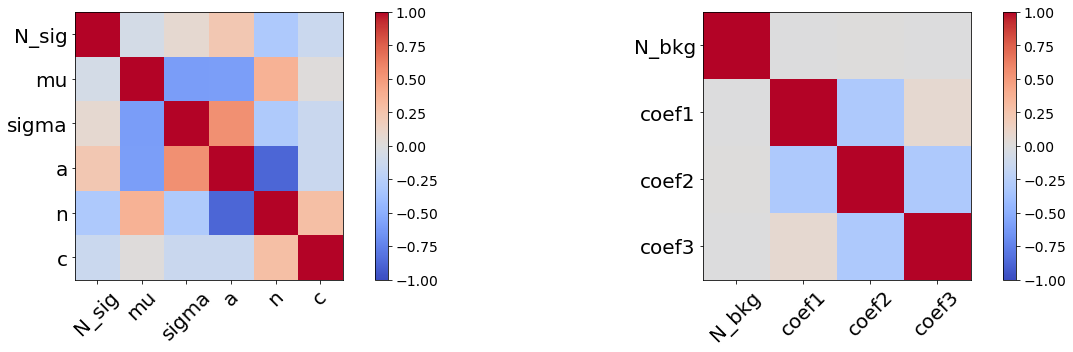

In [26]:
pcov_list = [result['signal']['pcov'], result['background']['pcov']]
param_sig = ['N_sig', 'mu', 'sigma', 'a', 'n', 'c']
param_bkg = ['N_bkg', 'coef1', 'coef2', 'coef3']
param_names_list = [param_sig, param_bkg]
Fit.correlation_matrix(pcov_list, param_names_list)

### Signal from gap and background from generic sample

In [38]:
text_sig = 'signal: ' + f"{result_mucoefs_float['params'][0]} " + '\u00B1' + f" {result_mucoefs_float['uncertainty'][0]}"
print(text_sig)

signal: 504.2447370445981±81.36539817506537


No zero in signal+noise bin_counts list
<function fitting_sig_bkg.<locals>.<lambda> at 0x13cac4ee0>
N_sig + N_bkg       Sum of sig + bkg entries         difference
7098                         7101                      3.478


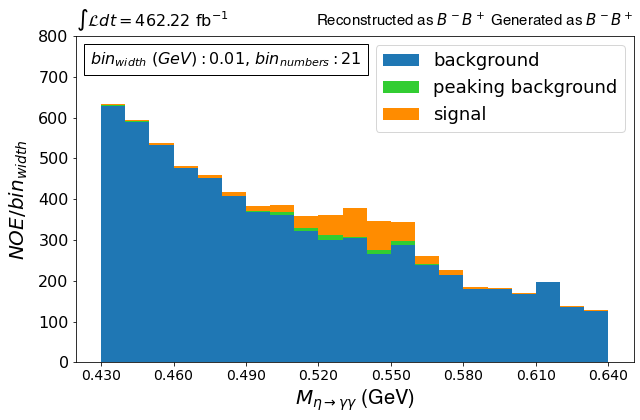

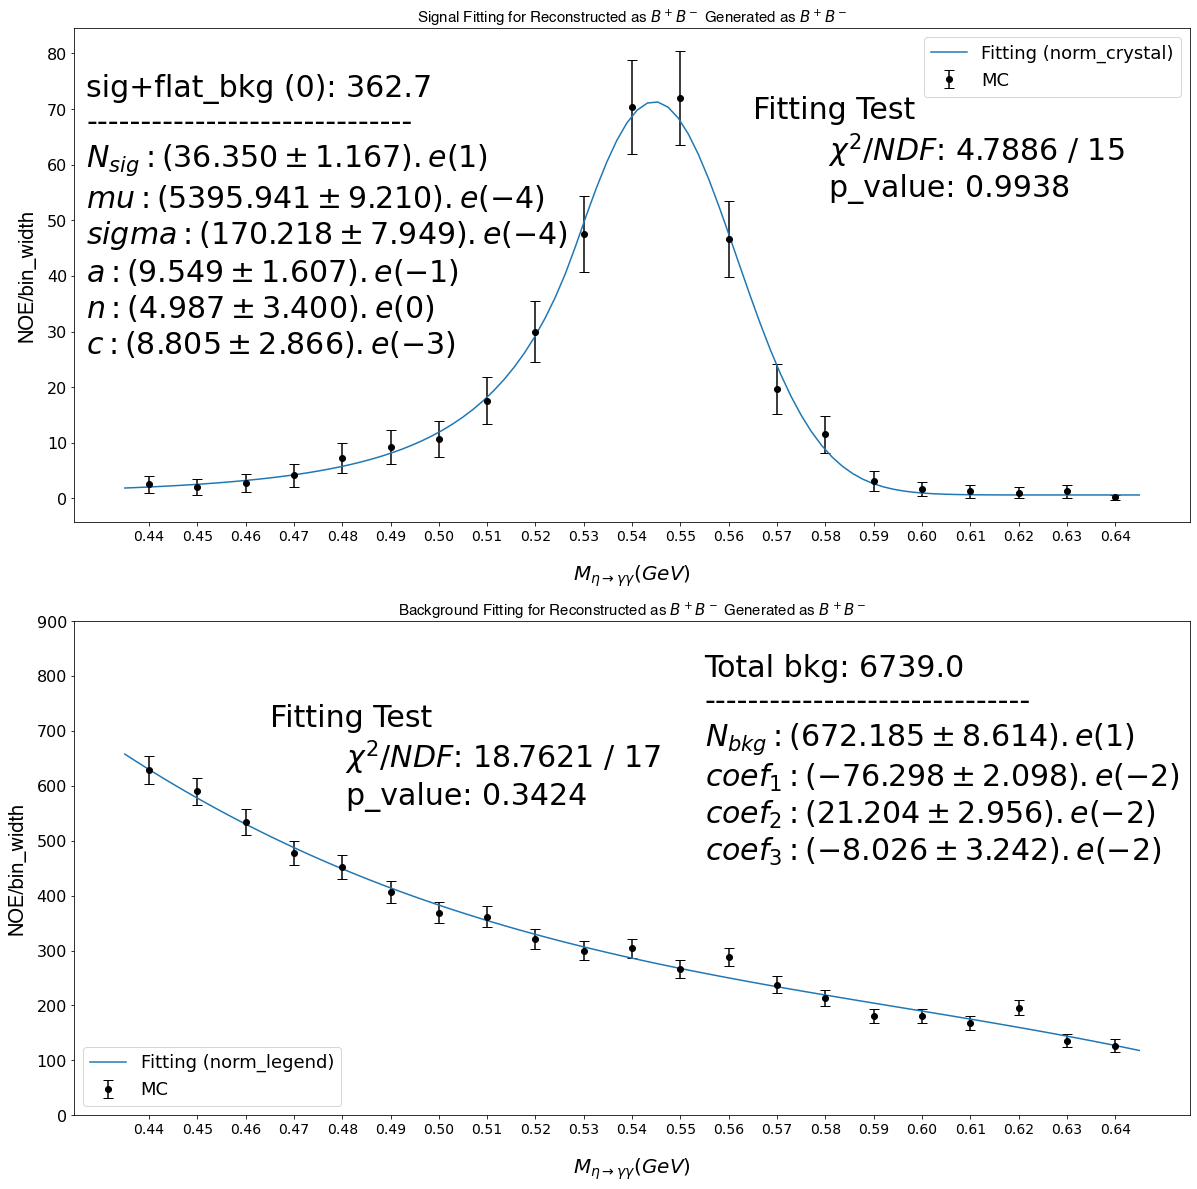

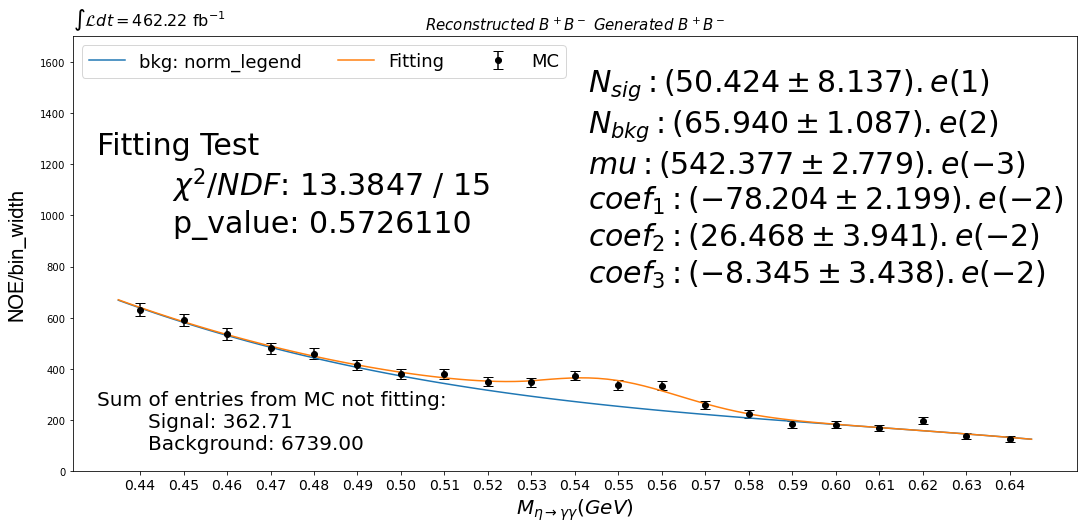

signal: 504.245 ± 81.365
background: 6593.984 ± 108.736


In [40]:
eta_x, eta_y_sig, eta_y_bkg, eta_bin_count = Fit.plot_sigbkg_InvM_hist(eta_df_ckg_generic, eta_df_sig, 'signal',y_axis_sapce=800, scale=(1, 1, scale), flat_bkg=False, df_pkg=eta_df_pkg_generic)
plt.title(r'Reconstructed as $B^-B^+$ Generated as $B^-B^+$',
          loc='right', pad=10, fontdict=form_title)
text = '$\int \mathcal{L} dt = $' + f'{mclumi_generic:.2f}' + r' fb$^{-1}$'
plt.annotate(text, xy=(0, 1.01), 
             fontsize=16,
             xycoords='axes fraction',
             horizontalalignment='left',
             verticalalignment='bottom')

result = Fit.fitting_sig_bkg('B^+B^-', 'B^+B^-', eta_x, eta_y_sig, eta_y_bkg, param_text_location_sig=(0.422, 20), param_text_location_bkg=(0.55, 400), max_ylim_bkg=900, bkg_func=fit.norm_legend, flat_bkg=0)

bounds = [[0, 0, 0, -2, -2, -2],[np.inf, np.inf, 0.56, 1, 2, 2]]
result_mucoefs_float = Fit.fitting_sig_plus_bkg(
    eta_x, eta_bin_count, result, 'MC', mclumi_generic, text_params_position=(0.538, 600), max_ylim=1700, legend_loc='upper left', bounds=bounds, bkg_func=Fit.norm_legend, float_mu_legendre=True, MC_info_loc=(0.425, 1), fitting_info_loc=(0.425, 800)
    )

print('signal: ' + f"{result_mucoefs_float['params'][0]:.3f} " + '\u00B1' + f" {result_mucoefs_float['uncertainty'][0]:.3f}")
print('background: ' + f"{result_mucoefs_float['params'][1]:.3f} " + '\u00B1' + f" {result_mucoefs_float['uncertainty'][1]:.3f}")


No zero in signal+noise bin_counts list
<function fitting_sig_bkg.<locals>.<lambda> at 0x13ca868b0>
N_sig + N_bkg       Sum of sig + bkg entries         difference
7086                         7095                      8.028


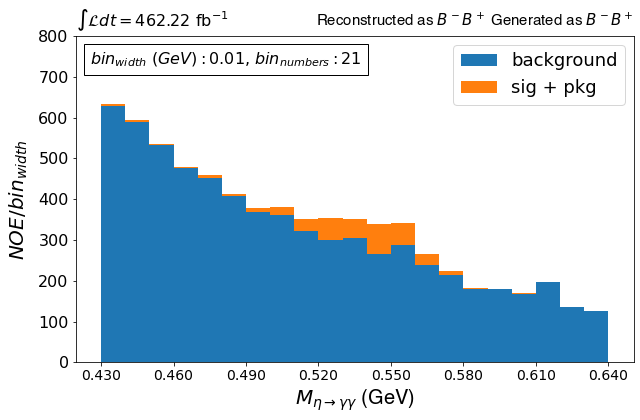

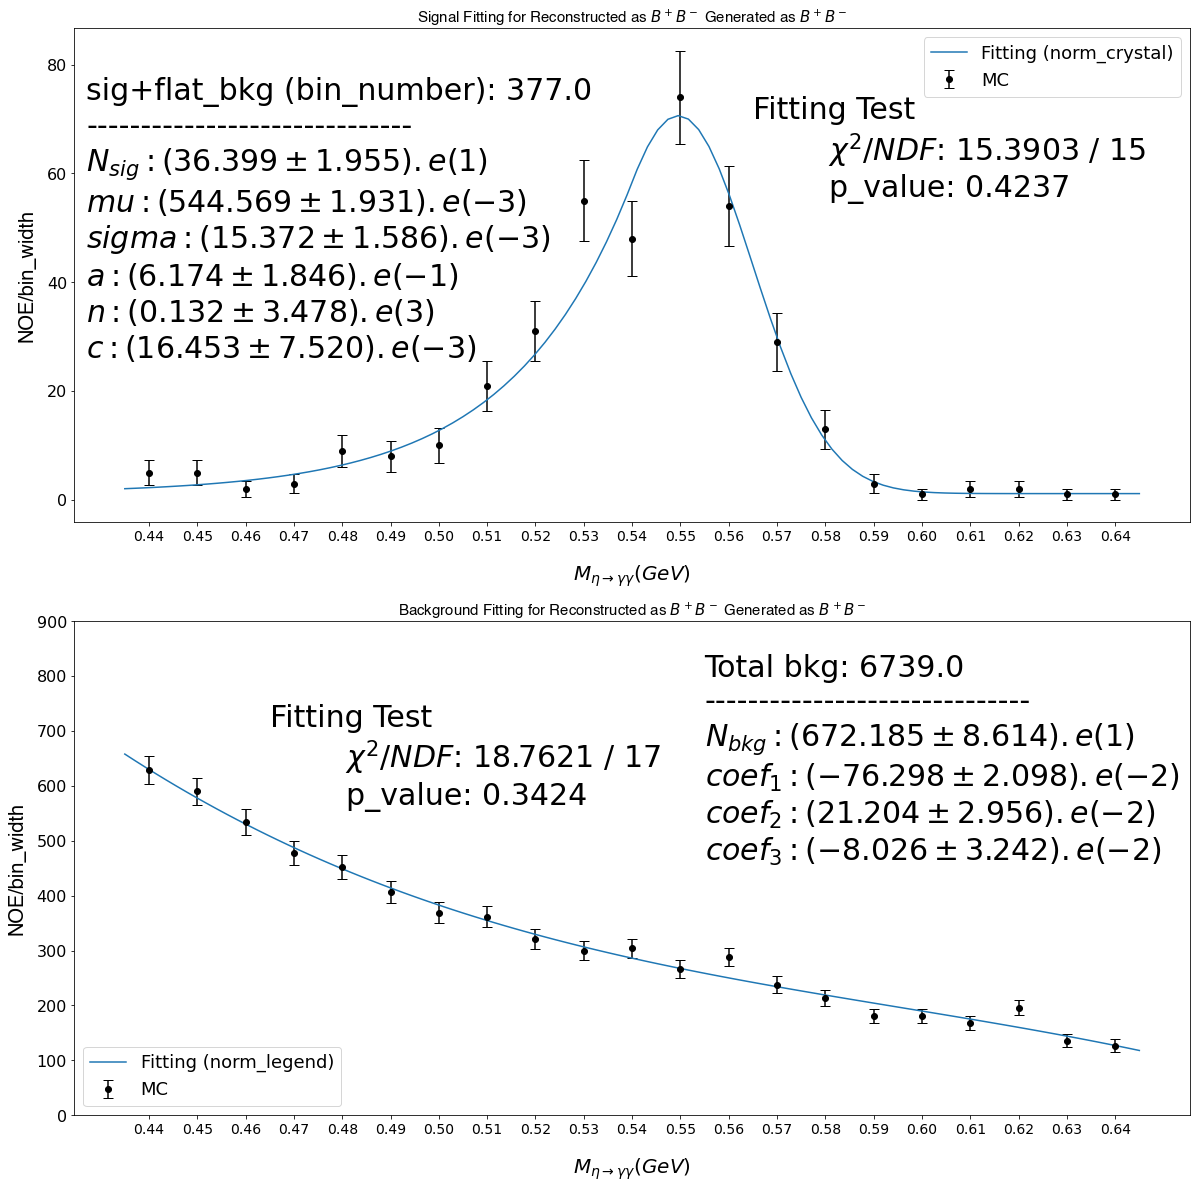

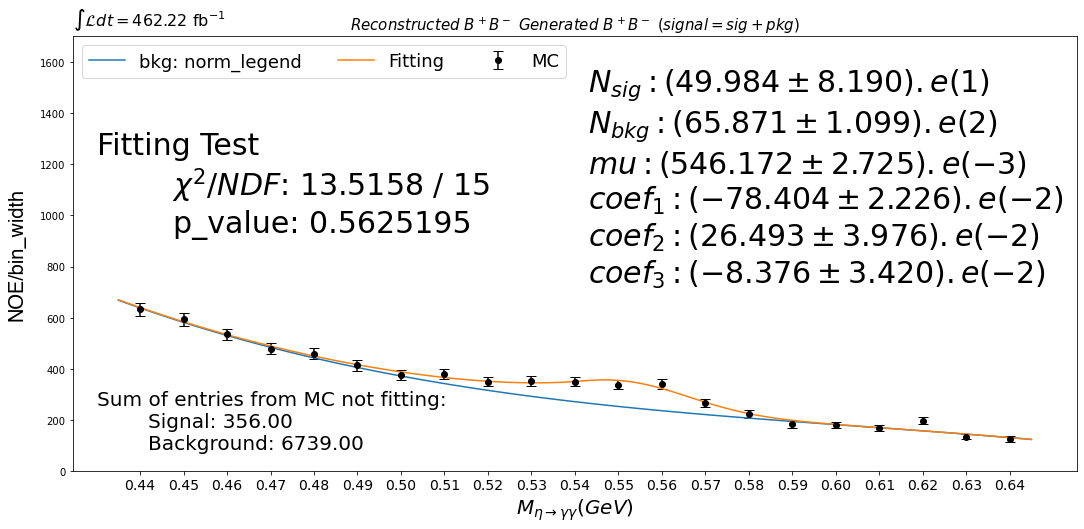

signal: 499.838 ± 81.897
background: 6587.135 ± 109.865


In [76]:
eta_x_generic, eta_y_sig_generic, eta_y_bkg_generic, eta_bin_count_generic = Fit.plot_sigbkg_InvM_hist(eta_df_ckg_generic, eta_df_sigpkg_generic, 'sig + pkg',y_axis_sapce=800, scale=(1, 1), flat_bkg='bin_number')
plt.title(r'Reconstructed as $B^-B^+$ Generated as $B^-B^+$',
          loc='right', pad=10, fontdict=form_title)
text = '$\int \mathcal{L} dt = $' + f'{mclumi_generic:.2f}' + r' fb$^{-1}$'
plt.annotate(text, xy=(0, 1.01), 
             fontsize=16,
             xycoords='axes fraction',
             horizontalalignment='left',
             verticalalignment='bottom')

result_generic = Fit.fitting_sig_bkg('B^+B^-', 'B^+B^-', eta_x_generic, eta_y_sig_generic, eta_y_bkg_generic, param_text_location_sig=(0.422, 20), param_text_location_bkg=(0.55, 400), max_ylim_bkg=900, bkg_func=fit.norm_legend, flat_bkg='bin_number')

bounds = [[0, 0, 0, -2, -2, -2],[np.inf, np.inf, 0.56, 1, 2, 2]]
result_mucoefs_float_generic = Fit.fitting_sig_plus_bkg(
    eta_x_generic, eta_bin_count_generic, result_generic, 'MC', mclumi_generic, text_params_position=(0.538, 600), max_ylim=1700, legend_loc='upper left', bounds=bounds, bkg_func=Fit.norm_legend, float_mu_legendre=True, MC_info_loc=(0.425, 1), fitting_info_loc=(0.425, 800)
    )

print('signal: ' + f"{result_mucoefs_float_generic['params'][0]:.3f} " + '\u00B1' + f" {result_mucoefs_float_generic['uncertainty'][0]:.3f}")
print('background: ' + f"{result_mucoefs_float_generic['params'][1]:.3f} " + '\u00B1' + f" {result_mucoefs_float_generic['uncertainty'][1]:.3f}")


In [271]:
NBB_gap_charged = mcNBB_charged*scale
efficiency, delta_efficiency = Fit.calculate_efficiency(result_mucoefs_float['params'][0], result_mucoefs_float['uncertainty'][0], mc_Npkg=0, mc_BF=0.5, NBB=NBB_gap_charged)
print(f'efficiency_gap = {efficiency:.2e} \u00B1 {delta_efficiency:.2e}')

efficiency_gap = 1.17e-04 ± 1.89e-05


In [268]:
NBB_generic = mcNBB_generic / 2
efficiency_generic, delta_efficiency_generic = Fit.calculate_efficiency(result_mucoefs_float_generic['params'][0], result_mucoefs_float_generic['uncertainty'][0], mc_Npkg=60, mc_BF=BF_D2slnu_charged, NBB=NBB_generic)
print(f'efficiency_generic = {efficiency_generic:.3e} \u00B1 {delta_efficiency_generic:.3e}')

efficiency_generic = 1.076e-04 ± 2.012e-05


In [270]:
NBB_gap_charged, mcNBB_generic / 2

(4297195.02914152, 254222500.0)

In [97]:
print(f'gap and generic efficiency difference: {abs(efficiency_generic - efficiency)/efficiency_generic * 100:.3f} %')

gap and generic efficiency difference: 9.060 %


# General Info Checking

## Signal in gap and generic

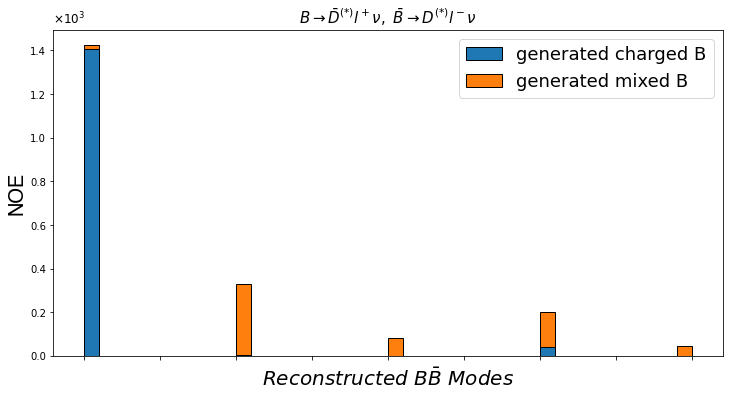

In [11]:
num_bins = 40
# data
rec_charged_oneB_Dlnu = gap_sample.loc['rec_charged'].query(f'B0_decayModeID=={Dl_rec_Bp} & B1_decayModeID=={Dl_rec_Bp}')
rec_mixed_oneB_Dlnu = gap_sample.loc['rec_mixed'].query(f'B0_decayModeID=={Dl_rec_B0 + Dl_rec_Bp} & B1_decayModeID=={Dl_rec_B0 + Dl_rec_Bp}')
rec_charged_gen_charged_oneB_Dlnu,_ = Fit.bestcan(rec_charged_oneB_Dlnu.loc['gen_charged'])
rec_mixed_gen_charged_oneB_Dlnu,_ = Fit.bestcan(rec_mixed_oneB_Dlnu.loc['gen_charged'])
rec_charged_gen_mixed_oneB_Dlnu,_ = Fit.bestcan(rec_charged_oneB_Dlnu.loc['gen_mixed'])
rec_mixed_gen_mixed_oneB_Dlnu,_ = Fit.bestcan(rec_mixed_oneB_Dlnu.loc['gen_mixed'])

true_charged = pd.concat([rec_charged_gen_charged_oneB_Dlnu['decayModeID'], rec_mixed_gen_charged_oneB_Dlnu['decayModeID']])-3005530
true_mixed = pd.concat([rec_charged_gen_mixed_oneB_Dlnu['decayModeID'], rec_mixed_gen_mixed_oneB_Dlnu['decayModeID']])-3005530

# normalization
scaling = 1 / 1000
weights_charged = np.full_like(true_charged, scaling)
weights_mixed = np.full_like(true_mixed, scaling)

plt.figure(figsize=(12, 6))
lables = ['generated charged B', 'generated mixed B']
c, e, _ = plt.hist([true_charged, true_mixed], bins=num_bins, weights=[ weights_charged, weights_mixed], edgecolor='black', histtype='barstacked', label=lables)
plt.xlabel(r"$Reconstructed \ B\bar{B}\ Modes$", fontdict=form_label)
plt.ylabel(f"NOE", fontdict=form_label)
plt.title(r"$B \rightarrow \bar{D}^{(*)}l^+\nu,\ \bar{B}\rightarrow D^{(*)}l^-\nu$", fontdict=form_title)
plt.legend(fontsize=18)
# text = '$\int \mathcal{L} dt = $' + f'{mclumi:.2f}' + r' fb$^{-1}$'
# plt.annotate(text, xy=(0.78, 1.01), 
#              fontsize=16,
#              xycoords='axes fraction',
#              horizontalalignment='left',
#              verticalalignment='bottom')

# Add the scale factor annotation
ax = plt.gca()
plt.text(0, 1.01, r'$\times 10^{3}$', transform=ax.transAxes, va='bottom', ha='left', fontsize=12)
ax.set_xticklabels([])

plt.show()



Let's look at the energy of the eta in signal and and background

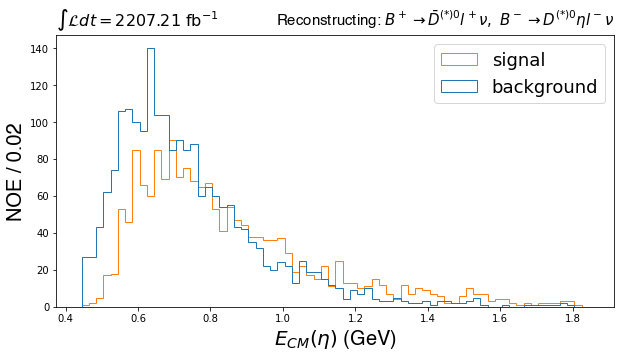

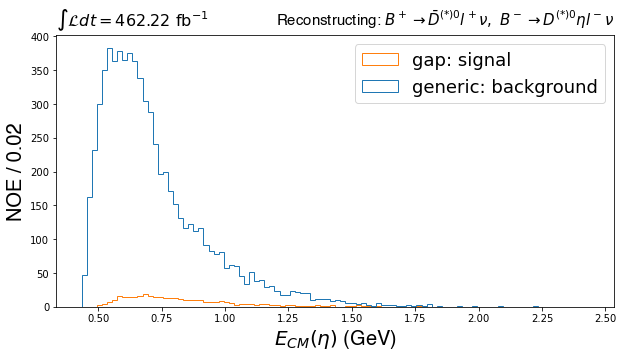

In [12]:
# this is a comparison between signal and background both from gap
eta_ECM_sig = pd.concat([eta_df_sig['pi4_B0_ECM'], eta_df_sig['pi4_B1_ECM']])
eta_ECM_bkg = pd.concat([eta_df_bkg['pi4_B0_ECM'], eta_df_bkg['pi4_B1_ECM']])
# plot the histogram of the ECM of the eta
plt.figure(figsize=(10, 5))
c, e, _m = plt.hist([eta_ECM_bkg, eta_ECM_sig], bins=np.arange(np.min(eta_ECM_bkg), np.max(eta_ECM_bkg), 0.02), histtype='step', label=['background', 'signal'])
plt.xlabel(r"$E_{CM}(\eta)$ (GeV)", fontdict=form_label) 
plt.ylabel(f"NOE / {e[1]-e[0]:.2f}", fontdict=form_label)
plt.title(r"Reconstructing: $B^+ \rightarrow \bar{D}^{(*)0}l^+\nu,\ B^-\rightarrow D^{(*)0}\eta l^-\nu$",
          loc='right', pad=10, fontdict=form_title)

text = '$\int \mathcal{L} dt = $' + f'{mclumi:.2f}' + r' fb$^{-1}$'
plt.annotate(text, xy=(0, 1.01), 
             fontsize=16,
             xycoords='axes fraction',
             horizontalalignment='left',
             verticalalignment='bottom')

plt.legend(fontsize=18)
plt.show()

eta_ECM_sig = pd.concat([eta_df_sig['pi4_B0_ECM'], eta_df_sig['pi4_B1_ECM']])
eta_ECM_ckg_generic = pd.concat([eta_df_ckg_generic['pi4_B0_ECM'], eta_df_ckg_generic['pi4_B1_ECM']])
# plot the histogram of the ECM of the eta
plt.figure(figsize=(10, 5))
c, e, _m = plt.hist([eta_ECM_ckg_generic, eta_ECM_sig], bins=np.arange(np.min(eta_ECM_ckg_generic), np.max(eta_ECM_ckg_generic), 0.02), histtype='step', label=['generic: background', 'gap: signal'], weights=[np.full_like(eta_ECM_ckg_generic, 1), np.full_like(eta_ECM_sig, mclumi_generic/mclumi)])
plt.xlabel(r"$E_{CM}(\eta)$ (GeV)", fontdict=form_label) 
plt.ylabel(f"NOE / {e[1]-e[0]:.2f}", fontdict=form_label)
plt.title(r"Reconstructing: $B^+ \rightarrow \bar{D}^{(*)0}l^+\nu,\ B^-\rightarrow D^{(*)0}\eta l^-\nu$",
          loc='right', pad=10, fontdict=form_title)

text = '$\int \mathcal{L} dt = $' + f'{mclumi_generic:.2f}' + r' fb$^{-1}$'
plt.annotate(text, xy=(0, 1.01), 
             fontsize=16,
             xycoords='axes fraction',
             horizontalalignment='left',
             verticalalignment='bottom')

plt.legend(fontsize=18)
plt.show()

Let's look at the momentum of the eta in signal and background

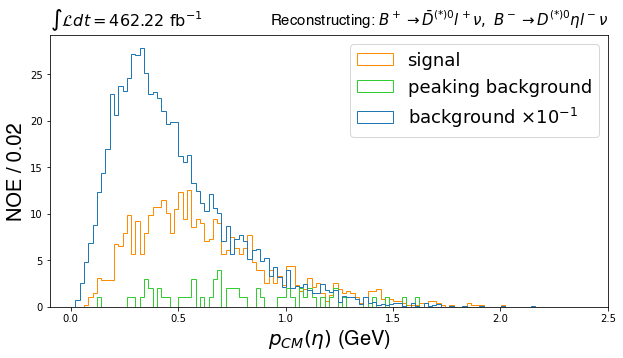

In [13]:
eta_pCM_sig = pd.concat([eta_df_sig['pi4_B0_pCM'], eta_df_sig['pi4_B1_pCM']])
eta_pCM_ckg_generic = pd.concat([eta_df_ckg_generic['pi4_B0_pCM'], eta_df_ckg_generic['pi4_B1_pCM']])
eta_pCM_pkg_generic = pd.concat([eta_df_pkg_generic['pi4_B0_pCM'], eta_df_pkg_generic['pi4_B1_pCM']])
# plot the histogram of the ECM of the eta
plt.figure(figsize=(10, 5))
weights=[np.full_like(eta_pCM_ckg_generic, 1/10), np.full_like(eta_pCM_pkg_generic, 1), np.full_like(eta_pCM_sig, scale)]
c, e, _m = plt.hist([eta_pCM_ckg_generic, eta_pCM_pkg_generic, eta_pCM_sig], bins=np.arange(np.min(eta_pCM_ckg_generic), np.max(eta_pCM_ckg_generic), 0.02), histtype='step', label=[r'background $\times 10^{-1}$', 'peaking background', 'signal'], color=['C0', 'limegreen', 'darkorange'], weights=weights)
plt.xlabel(r"$p_{CM}(\eta)$ (GeV)", fontdict=form_label) 
plt.ylabel(f"NOE / {e[1]-e[0]:.2f}", fontdict=form_label)
plt.title(r"Reconstructing: $B^+ \rightarrow \bar{D}^{(*)0}l^+\nu,\ B^-\rightarrow D^{(*)0}\eta l^-\nu$",
          loc='right', pad=10, fontdict=form_title)

text = '$\int \mathcal{L} dt = $' + f'{mclumi_generic:.2f}' + r' fb$^{-1}$'
plt.annotate(text, xy=(0, 1.01), 
             fontsize=16,
             xycoords='axes fraction',
             horizontalalignment='left',
             verticalalignment='bottom')

plt.legend(fontsize=18)
plt.show()

B to D* mean 0.48, B to D* rms  0.26
B to D  mean 0.51, B to D  rms  0.25


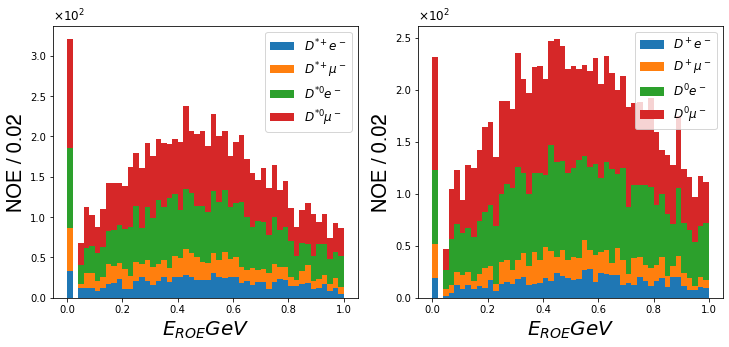

In [14]:
sampleDs=[
    np.array(pd.Series.to_list(Fit.bestcan(gap_sample.query(f"(B0_decayModeID=={slicevar} | B1_decayModeID=={slicevar})"))[0]['Eextra_ROE']))
    for slicevar in [100,101,300,301]
]
sampleD=[
    np.array(pd.Series.to_list(Fit.bestcan(gap_sample.query(f"(B0_decayModeID=={slicevar} | B1_decayModeID=={slicevar})"))[0]['Eextra_ROE']))
    for slicevar in [200,201,400,401]
]

# normalization
scaling = 1 / 100
# create a list of weights for each histogram

weights_Ds = [np.full_like(sampleDs[i], scaling) for i in range(len(sampleDs))]
weights_D = [np.full_like(sampleD[i], scaling) for i in range(len(sampleD))]

plt.figure(figsize=(12,5))
plt.subplot(121)
bin_values, edges, _ = plt.hist(sampleDs, bins=np.linspace(0.0, 1., 51), weights=weights_Ds,
                                histtype="barstacked", label=[r"$D^{*+}e^-$",r"$D^{*+}\mu^-$",r"$D^{*0}e^-$",r"$D^{*0}\mu^-$"])
plt.xlabel(xlabel=r"$E_{ROE} GeV$", fontdict=form_label)
plt.ylabel(ylabel=f"NOE / {edges[1] -edges[0]:.2f}", fontdict=form_label)
plt.legend(fontsize=12)
# text = '$\int \mathcal{L} dt = $' + f'{mclumi:.2f}' + r' fb$^{-1}$'
# plt.annotate(text, xy=(0.5, 1.01), 
#              fontsize=16,
#              xycoords='axes fraction',
#              horizontalalignment='left',
#              verticalalignment='bottom')
ax = plt.gca()
plt.text(0, 1.01, r'$\times 10^{2}$', transform=ax.transAxes, va='bottom', ha='left', fontsize=12)

plt.subplot(122)
bin_values, edges, _ = plt.hist(sampleD, bins=np.linspace(0.0, 1., 51), weights=weights_D,
                                histtype="barstacked", label=[r"$D^+e^-$",r"$D^+\mu^-$",r"$D^0e^-$",r"$D^0\mu^-$"])
plt.xlabel(xlabel=r"$E_{ROE} GeV$", fontdict=form_label)
plt.ylabel(ylabel=f"NOE / {edges[1] -edges[0]:.2f}", fontdict=form_label)
plt.legend(fontsize=12)
# text = '$\int \mathcal{L} dt = $' + f'{mclumi:.2f}' + r' fb$^{-1}$'
# plt.annotate(text, xy=(0.5, 1.01), 
#              fontsize=16,
#              xycoords='axes fraction',
#              horizontalalignment='left',
#              verticalalignment='bottom')
ax = plt.gca()
plt.text(0, 1.01, r'$\times 10^{2}$', transform=ax.transAxes, va='bottom', ha='left', fontsize=12)

print(f"B to D* mean {np.mean(np.concatenate(sampleDs)):.2f}, B to D* rms  {np.std(np.concatenate(sampleDs)):.2f}")
print(f"B to D  mean {np.mean(np.concatenate(sampleD )):.2f}, B to D  rms  {np.std(np.concatenate(sampleD )):.2f}")

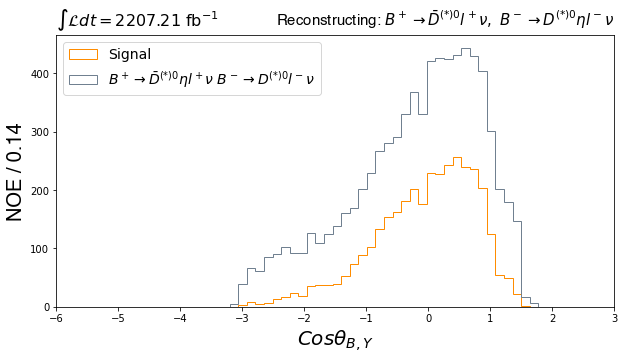

In [15]:
# from now they all have only the first candidate
rec_charged_BB= gap_sample.loc['rec_charged']
charged_Dlnu, _ = Fit.bestcan(rec_charged_BB[rec_charged_BB['B0_decayModeID'].isin(Dl_rec_Bp) & rec_charged_BB['B1_decayModeID'].isin(Dl_rec_Bp) & (rec_charged_BB['InvM']<15)])
cos_Dlnu = pd.concat([charged_Dlnu['cosBY0'], charged_Dlnu['cosBY1']])
charged_Detalnu_Dlnu = eta_df_BmBp_mincans
cos_Detalnu_Dlnu = pd.concat([charged_Detalnu_Dlnu['cosBY0'], charged_Detalnu_Dlnu['cosBY1']])
charged_Detalnu_Dlnu_signal = eta_df_sig
cos_Detalnu_Dlnu_sig = pd.concat([charged_Detalnu_Dlnu_signal['cosBY0'], charged_Detalnu_Dlnu_signal['cosBY1']])

plt.figure(figsize=(10, 5))
bins = np.linspace(np.min(cos_Dlnu), np.max(cos_Dlnu), 50)
labels = [r'$B^+\rightarrow \bar{D}^{(*)0}\eta l^+\nu \ B^- \rightarrow D^{(*)0}l^-\nu$',
          'Signal']
c, e, _ = plt.hist([cos_Detalnu_Dlnu, cos_Detalnu_Dlnu_sig], bins=bins, color=['slategray', 'darkorange'], histtype='step', label=labels)
plt.xticks(np.arange(-6, 4, 1))
plt.xlabel(r'$Cos\theta_{B,Y}$', fontdict=form_label)
plt.ylabel(f'NOE / {e[1] - e[0]:.2f}', fontdict=form_label)
plt.title(r"Reconstructing: $B^+ \rightarrow \bar{D}^{(*)0}l^+\nu,\ B^-\rightarrow D^{(*)0}\eta l^-\nu$",
          loc='right', pad=10, fontdict=form_title)

text = '$\int \mathcal{L} dt = $' + f'{mclumi:.2f}' + r' fb$^{-1}$'
plt.annotate(text, xy=(0., 1.01), 
             fontsize=16,
             xycoords='axes fraction',
             horizontalalignment='left',
             verticalalignment='bottom')
plt.legend(fontsize=14, loc='upper left')
plt.show()

lepton momentom in generic and gap samples for signal

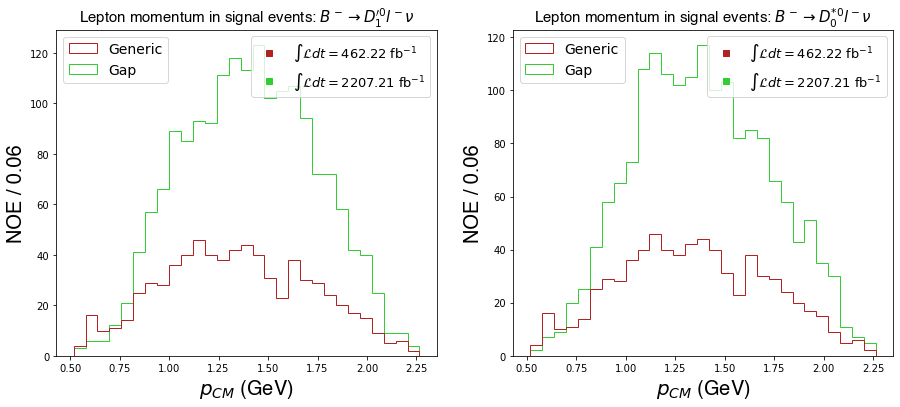

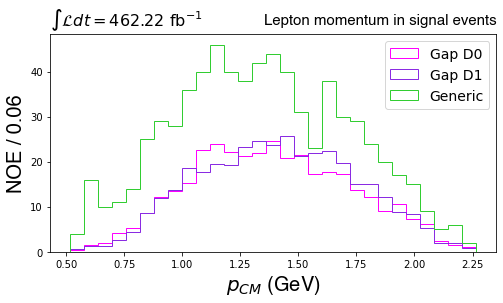

In [16]:
import matplotlib.lines as mlines
# Note: that's all about the signal comparison between the gap and generic samples and seperating for D1 and D0
# gap sample
D1_gap = eta_df_sig[(eta_df_sig['aBplusMode']%10000).isin([1005, 1025]) | (abs(eta_df_sig['aBminusMode'])%10000).isin([1005, 1025])]
D0_gap = eta_df_sig[(eta_df_sig['aBplusMode']%10000).isin([1004, 1024]) | (abs(eta_df_sig['aBminusMode'])%10000).isin([1004, 1024])]

pCM_l_D1_gap = pd.concat([D1_gap['e_B0_pCM'], D1_gap['e_B1_pCM']])
pCM_l_D0_gap = pd.concat([D0_gap['e_B0_pCM'], D0_gap['e_B1_pCM']])

# generic sample
pCM_l_generic = pd.concat([eta_df_sigpkg_generic['e_B0_pCM'], eta_df_sigpkg_generic['e_B1_pCM']])

# plot
plt.figure(figsize=(15, 6))
bins = np.linspace(np.min(pCM_l_generic), np.max(pCM_l_generic), 30)
plt.subplot(121)
counts, bin_edges, patches = plt.hist([pCM_l_generic, pCM_l_D1_gap], bins=bins, histtype='step', label=['Generic', 'Gap'], color=['firebrick', 'limegreen'])
plt.title(r'Lepton momentum in signal events: $B^-\rightarrow D^{\prime0}_1l^-\nu$', fontdict=form_title)
plt.xlabel(r'$p_{CM}$ (GeV)', fontdict=form_label)
plt.ylabel(f'NOE / {bin_edges[1] - bin_edges[0]:.2f}', fontdict=form_label)

# Create the first legend with the labels from the histogram
first_legend_handles = [patches[0][0], patches[1][0]]  # Take the first patch from each dataset
first_legend_labels = ['Generic', 'Gap']
first_legend = plt.legend(handles=first_legend_handles, labels=first_legend_labels, fontsize=14, loc='upper left')
plt.gca().add_artist(first_legend)

# Create custom legend entries for additional information
extra_info_generic = mlines.Line2D([], [], color='firebrick', marker='s', linestyle='None', label='$\int \mathcal{L} dt = $' + f'{mclumi_generic:.2f}' + r' fb$^{-1}$')
extra_info_gap = mlines.Line2D([], [], color='limegreen', marker='s', linestyle='None', label='$\int \mathcal{L} dt = $' + f'{mclumi:.2f}' + r' fb$^{-1}$')
# Create the second legend with the custom entries
second_legend = plt.legend(handles=[extra_info_generic, extra_info_gap], loc='upper right', fontsize=13)


plt.subplot(122)
counts, bin_edges, patches = plt.hist([pCM_l_generic, pCM_l_D0_gap], bins=bins, histtype='step', label=['Generic', 'Gap'], color=['firebrick', 'limegreen'])
plt.title(r'Lepton momentum in signal events: $B^-\rightarrow D^{*0}_0l^-\nu$', fontdict=form_title)
plt.xlabel(r'$p_{CM}$ (GeV)', fontdict=form_label)
plt.ylabel(f'NOE / {bin_edges[1] - bin_edges[0]:.2f}', fontdict=form_label)

# Create the first legend with the labels from the histogram
first_legend_handles = [patches[0][0], patches[1][0]]  # Take the first patch from each dataset
first_legend_labels = ['Generic', 'Gap']
first_legend = plt.legend(handles=first_legend_handles, labels=first_legend_labels, fontsize=14, loc='upper left')
plt.gca().add_artist(first_legend)

# Create custom legend entries for additional information
extra_info_generic = mlines.Line2D([], [], color='firebrick', marker='s', linestyle='None', label='$\int \mathcal{L} dt = $' + f'{mclumi_generic:.2f}' + r' fb$^{-1}$')
extra_info_gap = mlines.Line2D([], [], color='limegreen', marker='s', linestyle='None', label='$\int \mathcal{L} dt = $' + f'{mclumi:.2f}' + r' fb$^{-1}$')
# Create the second legend with the custom entries
second_legend = plt.legend(handles=[extra_info_generic, extra_info_gap], loc='upper right', fontsize=13)

plt.show()

plt.figure(figsize=(8, 4))
bins = np.linspace(np.min(pCM_l_generic), np.max(pCM_l_generic), 30)
weights=[np.full_like(pCM_l_generic, 1), np.full_like(pCM_l_D1_gap, scale), np.full_like(pCM_l_D0_gap, scale)]
plt.hist([pCM_l_generic, pCM_l_D1_gap, pCM_l_D0_gap], bins=bins, histtype='step', label=['Generic', 'Gap D1', 'Gap D0'], color=['limegreen', 'blueviolet', 'fuchsia'], weights=weights)
plt.title(r'Lepton momentum in signal events', fontdict=form_title, loc='right', pad=10)
plt.xlabel(r'$p_{CM}$ (GeV)', fontdict=form_label)
plt.ylabel(f'NOE / {bin_edges[1] - bin_edges[0]:.2f}', fontdict=form_label)

text = '$\int \mathcal{L} dt = $' + f'{mclumi_generic:.2f}' + r' fb$^{-1}$'
plt.annotate(text, xy=(0., 1.01), 
             fontsize=16,
             xycoords='axes fraction',
             horizontalalignment='left',
             verticalalignment='bottom')
plt.legend(fontsize=14, loc='upper left')

plt.legend(fontsize=14)
plt.show()


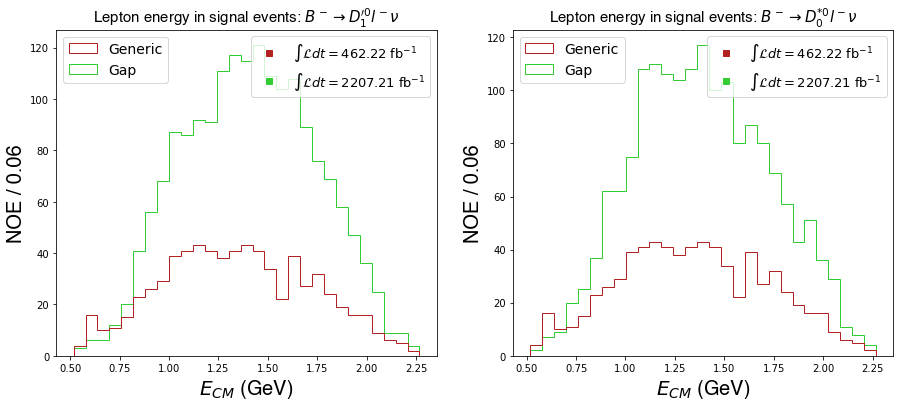

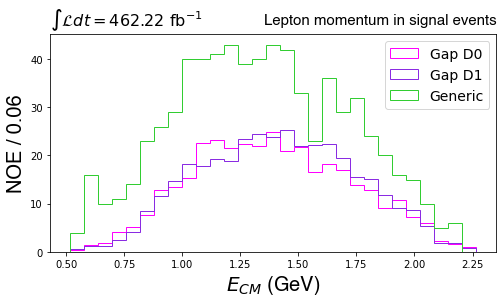

In [17]:
# Note: that's all about the signal comparison between the gap and generic samples and seperating for D1 and D0
# gap sample
D1_gap = eta_df_sig[(eta_df_sig['aBplusMode']%10000).isin([1005, 1025]) | (abs(eta_df_sig['aBminusMode'])%10000).isin([1005, 1025])]
D0_gap = eta_df_sig[(eta_df_sig['aBplusMode']%10000).isin([1004, 1024]) | (abs(eta_df_sig['aBminusMode'])%10000).isin([1004, 1024])]

E_l_D1_gap = pd.concat([D1_gap['e_B0_ECM'], D1_gap['e_B1_ECM']])
E_l_D0_gap = pd.concat([D0_gap['e_B0_ECM'], D0_gap['e_B1_ECM']])

# generic sample
E_l_generic = pd.concat([eta_df_sigpkg_generic['e_B0_ECM'], eta_df_sigpkg_generic['e_B1_ECM']])

# plot
plt.figure(figsize=(15, 6))
bins = np.linspace(np.min(E_l_generic), np.max(E_l_generic), 30)
plt.subplot(121)
counts, bin_edges, patches = plt.hist([E_l_generic, E_l_D1_gap], bins=bins, histtype='step', label=['Generic', 'Gap'], color=['firebrick', 'limegreen'])
plt.title(r'Lepton energy in signal events: $B^-\rightarrow D^{\prime0}_1l^-\nu$', fontdict=form_title)
plt.xlabel(r'$E_{CM}$ (GeV)', fontdict=form_label)
plt.ylabel(f'NOE / {bin_edges[1] - bin_edges[0]:.2f}', fontdict=form_label)

# Create the first legend with the labels from the histogram
first_legend_handles = [patches[0][0], patches[1][0]]  # Take the first patch from each dataset
first_legend_labels = ['Generic', 'Gap']
first_legend = plt.legend(handles=first_legend_handles, labels=first_legend_labels, fontsize=14, loc='upper left')
plt.gca().add_artist(first_legend)

# Create custom legend entries for additional information
extra_info_generic = mlines.Line2D([], [], color='firebrick', marker='s', linestyle='None', label='$\int \mathcal{L} dt = $' + f'{mclumi_generic:.2f}' + r' fb$^{-1}$')
extra_info_gap = mlines.Line2D([], [], color='limegreen', marker='s', linestyle='None', label='$\int \mathcal{L} dt = $' + f'{mclumi:.2f}' + r' fb$^{-1}$')
# Create the second legend with the custom entries
second_legend = plt.legend(handles=[extra_info_generic, extra_info_gap], loc='upper right', fontsize=13)


plt.subplot(122)
counts, bin_edges, patches = plt.hist([E_l_generic, E_l_D0_gap], bins=bins, histtype='step', label=['Generic', 'Gap'], color=['firebrick', 'limegreen'])
plt.title(r'Lepton energy in signal events: $B^-\rightarrow D^{*0}_0l^-\nu$', fontdict=form_title)
plt.xlabel(r'$E_{CM}$ (GeV)', fontdict=form_label)
plt.ylabel(f'NOE / {bin_edges[1] - bin_edges[0]:.2f}', fontdict=form_label)

# Create the first legend with the labels from the histogram
first_legend_handles = [patches[0][0], patches[1][0]]  # Take the first patch from each dataset
first_legend_labels = ['Generic', 'Gap']
first_legend = plt.legend(handles=first_legend_handles, labels=first_legend_labels, fontsize=14, loc='upper left')
plt.gca().add_artist(first_legend)

# Create custom legend entries for additional information
extra_info_generic = mlines.Line2D([], [], color='firebrick', marker='s', linestyle='None', label='$\int \mathcal{L} dt = $' + f'{mclumi_generic:.2f}' + r' fb$^{-1}$')
extra_info_gap = mlines.Line2D([], [], color='limegreen', marker='s', linestyle='None', label='$\int \mathcal{L} dt = $' + f'{mclumi:.2f}' + r' fb$^{-1}$')
# Create the second legend with the custom entries

second_legend = plt.legend(handles=[extra_info_generic, extra_info_gap], loc='upper right', fontsize=13)

plt.show()

plt.figure(figsize=(8, 4))
bins = np.linspace(np.min(pCM_l_generic), np.max(pCM_l_generic), 30)
weights=[np.full_like(E_l_generic, 1), np.full_like(E_l_D1_gap, scale), np.full_like(E_l_D0_gap, scale)]
plt.hist([E_l_generic, E_l_D1_gap, E_l_D0_gap], bins=bins, histtype='step', label=['Generic', 'Gap D1', 'Gap D0'], color=['limegreen', 'blueviolet', 'fuchsia'], weights=weights)
plt.title(r'Lepton momentum in signal events', fontdict=form_title, loc='right', pad=10)
plt.xlabel(r'$E_{CM}$ (GeV)', fontdict=form_label)
plt.ylabel(f'NOE / {bin_edges[1] - bin_edges[0]:.2f}', fontdict=form_label)

text = '$\int \mathcal{L} dt = $' + f'{mclumi_generic:.2f}' + r' fb$^{-1}$'
plt.annotate(text, xy=(0., 1.01), 
             fontsize=16,
             xycoords='axes fraction',
             horizontalalignment='left',
             verticalalignment='bottom')
plt.legend(fontsize=14, loc='upper left')

plt.legend(fontsize=14)
plt.show()

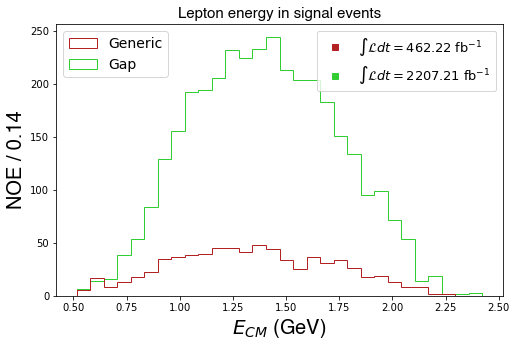

In [18]:
# momentum of the lepton in signal events in gap and generic samples, here in gap mode D1 and D0 are NOT seperated
ECM_l_generic = pd.concat([eta_df_sigpkg_generic['e_B0_ECM'], eta_df_sigpkg_generic['e_B1_ECM']])
ECM_l_gap = pd.concat([eta_df_sig['e_B0_ECM'], eta_df_sig['e_B1_ECM']])

plt.figure(figsize=(8, 5))
counts, bin_edges, patches = plt.hist([ECM_l_generic, ECM_l_gap], bins=30, histtype='step', label=['generic', 'gap'], color=['firebrick', 'limegreen'])
plt.title('Lepton energy in signal events', fontdict=form_title)
plt.xlabel(r'$E_{CM}$ (GeV)', fontdict=form_label)
plt.ylabel(f'NOE / {e[1] - e[0]:.2f}', fontdict=form_label)

# Create the first legend with the labels from the histogram
first_legend_handles = [patches[0][0], patches[1][0]]  # Take the first patch from each dataset
first_legend_labels = ['Generic', 'Gap']
first_legend = plt.legend(handles=first_legend_handles, labels=first_legend_labels, fontsize=14, loc='upper left')
plt.gca().add_artist(first_legend)

# Create custom legend entries for additional information
extra_info_generic = mlines.Line2D([], [], color='firebrick', marker='s', linestyle='None', label='$\int \mathcal{L} dt = $' + f'{mclumi_generic:.2f}' + r' fb$^{-1}$')
extra_info_gap = mlines.Line2D([], [], color='limegreen', marker='s', linestyle='None', label='$\int \mathcal{L} dt = $' + f'{mclumi:.2f}' + r' fb$^{-1}$')
# Create the second legend with the custom entries
second_legend = plt.legend(handles=[extra_info_generic, extra_info_gap], loc='upper right', fontsize=13)

plt.show()

### D $\eta$ combination

In [10]:
# invariant mass of D+eta
def Deta_invM(Tree):

    # calculating invariant mass of D pi by means of the 4-momentum vector
   mDB0 = np.array(Tree.D_B0_InvM)
   pDB0 = np.array(Tree.D_B0_pCM)
   phiDB0 = np.array(Tree.D_B0_phiCM)
   cthDB0 = np.array(Tree.D_B0_cosThCM)

   mpi4B0 = np.array(Tree.pi4_B0_InvM)
   ppi4B0 = np.array(Tree.pi4_B0_pCM)
   phipi4B0 = np.array(Tree.pi4_B0_phiCM)
   cthpi4B0 = np.array(Tree.pi4_B0_cosThCM)

   mDpi4B0 = np.sqrt(mDB0**2 + mpi4B0**2 + 
                     2*(np.sqrt(mDB0**2 + pDB0**2)*np.sqrt(mpi4B0**2 + ppi4B0**2) - 
                        pDB0*ppi4B0*(np.sqrt(1-cthDB0**2)*np.sqrt(1-cthpi4B0**2)*(np.cos(phiDB0)*np.cos(phipi4B0) + np.sin(phiDB0)*np.sin(phipi4B0)) + cthDB0*cthpi4B0))
                     )

   mDB1 = np.array(Tree.D_B1_InvM)
   pDB1 = np.array(Tree.D_B1_pCM)
   phiDB1 = np.array(Tree.D_B1_phiCM)
   cthDB1 = np.array(Tree.D_B1_cosThCM)

   mpi4B1 = np.array(Tree.pi4_B1_InvM)
   ppi4B1 = np.array(Tree.pi4_B1_pCM)
   phipi4B1 = np.array(Tree.pi4_B1_phiCM)
   cthpi4B1 = np.array(Tree.pi4_B1_cosThCM)

   mDpi4B1 = np.sqrt(mDB1**2 + mpi4B1**2 + 
                     2*(np.sqrt(mDB1**2 + pDB1**2)*np.sqrt(mpi4B1**2 + ppi4B1**2) - 
                        pDB1*ppi4B1*(np.sqrt(1-cthDB1**2)*np.sqrt(1-cthpi4B1**2)*(np.cos(phiDB1)*np.cos(phipi4B1) + np.sin(phiDB1)*np.sin(phipi4B1)) + cthDB1*cthpi4B1))
                     )
    
   return np.concatenate([mDpi4B0, mDpi4B1])

# Energy of D+eta 
def Deta_E(Tree):
   E_DB0 = np.array(Tree.D_B0_ECM)
   E_pi4B0 = np.array(Tree.pi4_B0_ECM)
   E_Dpi4B0 = E_DB0 + E_pi4B0
   
   E_DB1 = np.array(Tree.D_B1_ECM)
   E_pi4B1 = np.array(Tree.pi4_B1_ECM)
   E_Dpi4B1 = E_DB1 + E_pi4B1
   
   return np.concatenate([E_Dpi4B0, E_Dpi4B1])

# momentum of D+eta
def Deta_p(Tree):
   phi_DB0 = np.array(Tree.D_B0_phiCM)
   cth_DB0 = np.array(Tree.D_B0_cosThCM)
   pz_DB0 = np.array(Tree.D_B0_pCM)*cth_DB0
   px_DB0 = np.array(Tree.D_B0_pCM)*np.sqrt(1-cth_DB0**2)*np.cos(phi_DB0)
   py_DB0 = np.array(Tree.D_B0_pCM)*np.sqrt(1-cth_DB0**2)*np.sin(phi_DB0)
   
   phi_pi4B0 = np.array(Tree.pi4_B0_phiCM)
   cth_pi4B0 = np.array(Tree.pi4_B0_cosThCM)
   pz_pi4B0 = np.array(Tree.pi4_B0_pCM)*cth_pi4B0
   px_pi4B0 = np.array(Tree.pi4_B0_pCM)*np.sqrt(1-cth_pi4B0**2)*np.cos(phi_pi4B0)
   py_pi4B0 = np.array(Tree.pi4_B0_pCM)*np.sqrt(1-cth_pi4B0**2)*np.sin(phi_pi4B0)
   
   p_DetaB0 = np.sqrt((px_DB0 + px_pi4B0)**2 + (py_DB0 + py_pi4B0)**2 + (pz_DB0 + pz_pi4B0)**2)
   
   phi_DB1 = np.array(Tree.D_B1_phiCM)
   cth_DB1 = np.array(Tree.D_B1_cosThCM)
   pz_DB1 = np.array(Tree.D_B1_pCM)*cth_DB1
   px_DB1 = np.array(Tree.D_B1_pCM)*np.sqrt(1-cth_DB1**2)*np.cos(phi_DB1)
   py_DB1 = np.array(Tree.D_B1_pCM)*np.sqrt(1-cth_DB1**2)*np.sin(phi_DB1)
   
   phi_pi4B1 = np.array(Tree.pi4_B1_phiCM)
   cth_pi4B1 = np.array(Tree.pi4_B1_cosThCM)
   pz_pi4B1 = np.array(Tree.pi4_B1_pCM)*cth_pi4B1
   px_pi4B1 = np.array(Tree.pi4_B1_pCM)*np.sqrt(1-cth_pi4B1**2)*np.cos(phi_pi4B1)
   py_pi4B1 = np.array(Tree.pi4_B1_pCM)*np.sqrt(1-cth_pi4B1**2)*np.sin(phi_pi4B1)
   
   p_DetaB1 = np.sqrt((px_DB1 + px_pi4B1)**2 + (py_DB1 + py_pi4B1)**2 + (pz_DB1 + pz_pi4B1)**2)
   
   return np.concatenate([p_DetaB0, p_DetaB1])

def Deta_cos(Tree):
   phiDB0 = np.array(Tree.D_B0_phiCM)
   cthDB0 = np.array(Tree.D_B0_cosThCM)
   
   phipi4B0 = np.array(Tree.pi4_B0_phiCM)
   cthpi4B0 = np.array(Tree.pi4_B0_cosThCM)
   
   cosDeta_B0 = np.sqrt(1-cthDB0**2)*np.sqrt(1-cthpi4B0**2)*(np.cos(phiDB0)*np.cos(phipi4B0) + np.sin(phiDB0)*np.sin(phipi4B0)) + cthDB0*cthpi4B0
   
   phiDB1 = np.array(Tree.D_B1_phiCM)
   cthDB1 = np.array(Tree.D_B1_cosThCM)
   
   phipi4B1 = np.array(Tree.pi4_B1_phiCM)
   cthpi4B1 = np.array(Tree.pi4_B1_cosThCM)
   
   cosDeta_B1 = np.sqrt(1-cthDB1**2)*np.sqrt(1-cthpi4B1**2)*(np.cos(phiDB1)*np.cos(phipi4B1) + np.sin(phiDB1)*np.sin(phipi4B1)) + cthDB1*cthpi4B1
   
   return np.concatenate([cosDeta_B0, cosDeta_B1])

$\eta$ l combination

In [11]:
# invariant mass of D+eta
def leta_invM(Tree):

    # calculating invariant mass of D pi by means of the 4-momentum vector
   mlB0 = np.array(Tree.e_B0_InvM)
   plB0 = np.array(Tree.e_B0_pCM)
   philB0 = np.array(Tree.e_B0_phiCM)
   cthlB0 = np.array(Tree.e_B0_cosThCM)

   mpi4B0 = np.array(Tree.pi4_B0_InvM)
   ppi4B0 = np.array(Tree.pi4_B0_pCM)
   phipi4B0 = np.array(Tree.pi4_B0_phiCM)
   cthpi4B0 = np.array(Tree.pi4_B0_cosThCM)

   mlpi4B0 = np.sqrt(mlB0**2 + mpi4B0**2 + 
                     2*(np.sqrt(mlB0**2 + plB0**2)*np.sqrt(mpi4B0**2 + ppi4B0**2) - 
                        plB0*ppi4B0*(np.sqrt(1-cthlB0**2)*np.sqrt(1-cthpi4B0**2)*(np.cos(philB0)*np.cos(phipi4B0) + np.sin(philB0)*np.sin(phipi4B0)) + cthlB0*cthpi4B0))
                     )

   mlB1 = np.array(Tree.e_B1_InvM)
   plB1 = np.array(Tree.e_B1_pCM)
   philB1 = np.array(Tree.e_B1_phiCM)
   cthlB1 = np.array(Tree.e_B1_cosThCM)

   mpi4B1 = np.array(Tree.pi4_B1_InvM)
   ppi4B1 = np.array(Tree.pi4_B1_pCM)
   phipi4B1 = np.array(Tree.pi4_B1_phiCM)
   cthpi4B1 = np.array(Tree.pi4_B1_cosThCM)

   mlpi4B1 = np.sqrt(mlB1**2 + mpi4B1**2 + 
                     2*(np.sqrt(mlB1**2 + plB1**2)*np.sqrt(mpi4B1**2 + ppi4B1**2) - 
                        plB1*ppi4B1*(np.sqrt(1-cthlB1**2)*np.sqrt(1-cthpi4B1**2)*(np.cos(philB1)*np.cos(phipi4B1) + np.sin(philB1)*np.sin(phipi4B1)) + cthlB1*cthpi4B1))
                     )
    
   return np.concatenate([mlpi4B0, mlpi4B1])

# Energy of D+eta 
def leta_E(Tree):
   E_lB0 = np.array(Tree.e_B0_ECM)
   E_pi4B0 = np.array(Tree.pi4_B0_ECM)
   E_lpi4B0 = E_lB0 + E_pi4B0
   
   E_lB1 = np.array(Tree.e_B1_ECM)
   E_pi4B1 = np.array(Tree.pi4_B1_ECM)
   E_lpi4B1 = E_lB1 + E_pi4B1
   
   return np.concatenate([E_lpi4B0, E_lpi4B1])

# momentum of D+eta
def leta_p(Tree):
   phi_lB0 = np.array(Tree.e_B0_phiCM)
   cth_lB0 = np.array(Tree.e_B0_cosThCM)
   pz_lB0 = np.array(Tree.e_B0_pCM)*cth_DB0
   px_lB0 = np.array(Tree.e_B0_pCM)*np.sqrt(1-cth_lB0**2)*np.cos(phi_lB0)
   py_lB0 = np.array(Tree.e_B0_pCM)*np.sqrt(1-cth_lB0**2)*np.sin(phi_lB0)
   
   phi_pi4B0 = np.array(Tree.pi4_B0_phiCM)
   cth_pi4B0 = np.array(Tree.pi4_B0_cosThCM)
   pz_pi4B0 = np.array(Tree.pi4_B0_pCM)*cth_pi4B0
   px_pi4B0 = np.array(Tree.pi4_B0_pCM)*np.sqrt(1-cth_pi4B0**2)*np.cos(phi_pi4B0)
   py_pi4B0 = np.array(Tree.pi4_B0_pCM)*np.sqrt(1-cth_pi4B0**2)*np.sin(phi_pi4B0)
   
   p_letaB0 = np.sqrt((px_lB0 + px_pi4B0)**2 + (py_lB0 + py_pi4B0)**2 + (pz_lB0 + pz_pi4B0)**2)
   
   phi_lB1 = np.array(Tree.e_B1_phiCM)
   cth_lB1 = np.array(Tree.e_B1_cosThCM)
   pz_lB1 = np.array(Tree.e_B1_pCM)*cth_DB1
   px_lB1 = np.array(Tree.e_B1_pCM)*np.sqrt(1-cth_lB1**2)*np.cos(phi_lB1)
   py_lB1 = np.array(Tree.e_B1_pCM)*np.sqrt(1-cth_lB1**2)*np.sin(phi_lB1)
   
   phi_pi4B1 = np.array(Tree.pi4_B1_phiCM)
   cth_pi4B1 = np.array(Tree.pi4_B1_cosThCM)
   pz_pi4B1 = np.array(Tree.pi4_B1_pCM)*cth_pi4B1
   px_pi4B1 = np.array(Tree.pi4_B1_pCM)*np.sqrt(1-cth_pi4B1**2)*np.cos(phi_pi4B1)
   py_pi4B1 = np.array(Tree.pi4_B1_pCM)*np.sqrt(1-cth_pi4B1**2)*np.sin(phi_pi4B1)
   
   p_letaB1 = np.sqrt((px_lB1 + px_pi4B1)**2 + (py_lB1 + py_pi4B1)**2 + (pz_lB1 + pz_pi4B1)**2)
   
   return np.concatenate([p_letaB0, p_letaB1])

def leta_cos(Tree):
   philB0 = np.array(Tree.e_B0_phiCM)
   cthlB0 = np.array(Tree.e_B0_cosThCM)
   
   phipi4B0 = np.array(Tree.pi4_B0_phiCM)
   cthpi4B0 = np.array(Tree.pi4_B0_cosThCM)
   
   cosleta_B0 = np.sqrt(1-cthlB0**2)*np.sqrt(1-cthpi4B0**2)*(np.cos(philB0)*np.cos(phipi4B0) + np.sin(philB0)*np.sin(phipi4B0)) + cthlB0*cthpi4B0
   
   philB1 = np.array(Tree.e_B1_phiCM)
   cthlB1 = np.array(Tree.e_B1_cosThCM)

   phipi4B1 = np.array(Tree.pi4_B1_phiCM)
   cthpi4B1 = np.array(Tree.pi4_B1_cosThCM)
   
   cosleta_B1 = np.sqrt(1-cthlB1**2)*np.sqrt(1-cthpi4B1**2)*(np.cos(philB1)*np.cos(phipi4B1) + np.sin(philB1)*np.sin(phipi4B1)) + cthlB1*cthpi4B1
   
   return np.concatenate([cosleta_B0, cosleta_B1])

B l combination

In [12]:
# invariant mass of B+l
def Bl_invM(Tree):

   # calculating invariant mass of D pi by means of the 4-momentum vector
   Tree0 = Tree.query('pi4_B0_isSignal==1')
   mB0 = np.array(Tree0.B0_InvM)
   pB0 = np.array(Tree0.B0_pCM)
   phiB0 = np.array(Tree0.B0_phiCM)
   cthB0 = np.array(Tree0.B0_cosThCM)

   mlB0 = np.array(Tree0.e_B0_InvM)
   plB0 = np.array(Tree0.e_B0_pCM)
   philB0 = np.array(Tree0.e_B0_phiCM)
   cthlB0 = np.array(Tree0.e_B0_cosThCM)

   # write the same thing as bellow for mB01
   mBlB0 = np.sqrt(mB0**2 + mlB0**2 -
                     2*(np.sqrt(mB0**2 + pB0**2)*np.sqrt(mlB0**2 + plB0**2) +
                        pB0*plB0*(np.sqrt(1-cthB0**2)*np.sqrt(1-cthlB0**2)*(np.cos(phiB0)*np.cos(philB0) + np.sin(phiB0)*np.sin(philB0)) + cthB0*cthlB0))
                     )

   Tree1 = Tree.query('pi4_B1_isSignal==1')
   mB1 = np.array(Tree1.B1_InvM)
   pB1 = np.array(Tree1.B1_pCM)
   phiB1 = np.array(Tree1.B1_phiCM)
   cthB1 = np.array(Tree1.B1_cosThCM)
   
   mlB1 = np.array(Tree1.e_B1_InvM)
   plB1 = np.array(Tree1.e_B1_pCM)
   philB1 = np.array(Tree1.e_B1_phiCM)
   cthlB1 = np.array(Tree1.e_B1_cosThCM)
   
   mBlB1 = np.sqrt(mB1**2 + mlB1**2 -
                     2*(np.sqrt(mB1**2 + pB1**2)*np.sqrt(mlB1**2 + plB1**2) +
                        pB1*plB1*(np.sqrt(1-cthB1**2)*np.sqrt(1-cthlB1**2)*(np.cos(phiB1)*np.cos(philB1) + np.sin(phiB1)*np.sin(philB1)) + cthB1*cthlB1))
                     )
   
   return np.concatenate([mBlB0, mBlB1])

# Energy of D+eta 
def Bl_E(Tree):
   Tree0 = Tree.query('pi4_B0_isSignal==1')
   E_B0 = np.array(Tree0.B0_ECM)
   E_lB0 = np.array(Tree0.e_B0_ECM)
   E_Bl_B0 = E_B0 - E_lB0
   
   Tree1 = Tree.query('pi4_B1_isSignal==1')
   E_B1 = np.array(Tree1.B1_ECM)
   E_lB1 = np.array(Tree1.e_B1_ECM)
   E_Bl_B1 = E_B1 - E_lB1
   
   return np.concatenate([E_Bl_B0, E_Bl_B1])

# momentum of D+eta
def Bl_p(Tree):
   Tree0 = Tree.query('pi4_B0_isSignal==1')
   phi_B0 = np.array(Tree0.B0_phiCM)
   cth_B0 = np.array(Tree0.B0_cosThCM)
   pz_B0 = np.array(Tree0.B0_pCM)*cth_B0
   px_B0 = np.array(Tree0.B0_pCM)*np.sqrt(1-cth_B0**2)*np.cos(phi_B0)
   py_B0 = np.array(Tree0.B0_pCM)*np.sqrt(1-cth_B0**2)*np.sin(phi_B0)
   
   phi_eB0 = np.array(Tree0.e_B0_phiCM)
   cth_eB0 = np.array(Tree0.e_B0_cosThCM)
   pz_eB0 = np.array(Tree0.e_B0_pCM)*cth_eB0
   px_eB0 = np.array(Tree0.e_B0_pCM)*np.sqrt(1-cth_eB0**2)*np.cos(phi_eB0)
   py_eB0 = np.array(Tree0.e_B0_pCM)*np.sqrt(1-cth_eB0**2)*np.sin(phi_eB0)
   
   p_BlB0 = np.sqrt((px_B0 - px_eB0)**2 + (py_B0 - py_eB0)**2 + (pz_B0 - pz_eB0)**2)
   
   Tree1 = Tree.query('pi4_B1_isSignal==1')
   phi_B1 = np.array(Tree1.B1_phiCM)
   cth_B1 = np.array(Tree1.B1_cosThCM)
   pz_B1 = np.array(Tree1.B1_pCM)*cth_B1
   px_B1 = np.array(Tree1.B1_pCM)*np.sqrt(1-cth_B1**2)*np.cos(phi_B1)
   py_B1 = np.array(Tree1.B1_pCM)*np.sqrt(1-cth_B1**2)*np.sin(phi_B1)
   
   phi_eB1 = np.array(Tree1.e_B1_phiCM)
   cth_eB1 = np.array(Tree1.e_B1_cosThCM)
   pz_eB1 = np.array(Tree1.e_B1_pCM)*cth_eB1
   px_eB1 = np.array(Tree1.e_B1_pCM)*np.sqrt(1-cth_eB1**2)*np.cos(phi_eB1)
   py_eB1 = np.array(Tree1.e_B1_pCM)*np.sqrt(1-cth_eB1**2)*np.sin(phi_eB1)
   
   p_BlB1 = np.sqrt((px_B1 - px_eB1)**2 + (py_B1 - py_eB1)**2 + (pz_B1 - pz_eB1)**2)
   
   return np.concatenate([p_BlB0, p_BlB1])

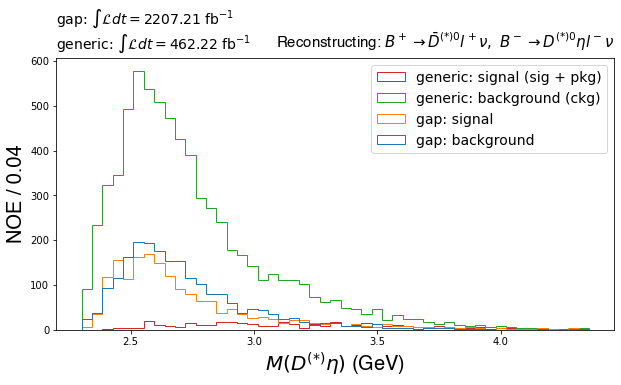

In [22]:
# gap sample
m_Deta_sig = Deta_invM(eta_df_sig)
m_Deta_sig = m_Deta_sig[~np.isnan(m_Deta_sig)]

m_Deta_bkg = Deta_invM(eta_df_bkg)
m_Deta_bkg = m_Deta_bkg[~np.isnan(m_Deta_bkg)]

# generic sample
m_Deta_sigpkg_generic = Deta_invM(eta_df_sigpkg_generic)
m_Deta_sigpkg_generic = m_Deta_sigpkg_generic[~np.isnan(m_Deta_sigpkg_generic)]

m_Deta_ckg_generic = Deta_invM(eta_df_ckg_generic)
m_Deta_ckg_generic = m_Deta_ckg_generic[~np.isnan(m_Deta_ckg_generic)]

# plot the stacked histogram of the invariant mass of D+eta for sig and bkg
plt.figure(figsize=(10, 5))
bins = np.linspace(np.min(m_Deta_bkg), np.max(m_Deta_bkg), 50)
labels = ['gap: background', 'gap: signal', 'generic: background (ckg)', 'generic: signal (sig + pkg)']
weights = [np.full_like(m_Deta_bkg, 1), np.full_like(m_Deta_sig, 1), np.full_like(m_Deta_ckg_generic, 1), np.full_like(m_Deta_sigpkg_generic, 1)]
c, e, _ = plt.hist([m_Deta_bkg, m_Deta_sig, m_Deta_ckg_generic, m_Deta_sigpkg_generic], weights=weights, bins=bins, histtype='step', label=labels)
plt.xlabel(r'$M(D^{(*)}\eta)$ (GeV)', fontdict=form_label)
plt.ylabel(f'NOE / {e[1] - e[0]:.2f}', fontdict=form_label)
plt.title(r"Reconstructing: $B^+ \rightarrow \bar{D}^{(*)0}l^+\nu,\ B^-\rightarrow D^{(*)0}\eta l^-\nu$",
          loc='right', pad=10, fontdict=form_title)

text = 'gap: $\int \mathcal{L} dt = $' + f'{mclumi:.2f}' + r' fb$^{-1}$' + '\n'\
       + 'generic: $\int \mathcal{L} dt = $' + f'{mclumi_generic:.2f}' + r' fb$^{-1}$'
plt.annotate(text, xy=(0., 1.01), 
             fontsize=14,
             xycoords='axes fraction',
             horizontalalignment='left',
             verticalalignment='bottom')

plt.legend(fontsize=14, loc='upper right')
plt.show()

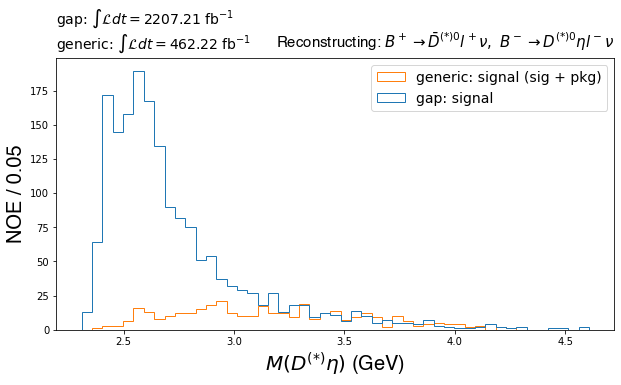

In [23]:
# gap sample
m_Deta_sig = Deta_invM(eta_df_sig)
m_Deta_sig = m_Deta_sig[~np.isnan(m_Deta_sig)]

# generic sample
m_Deta_sigpkg_generic = Deta_invM(eta_df_sigpkg_generic)
m_Deta_sigpkg_generic = m_Deta_sigpkg_generic[~np.isnan(m_Deta_sigpkg_generic)]

# plot the stacked histogram of the invariant mass of D+eta for sig and bkg
plt.figure(figsize=(10, 5))
bins = np.linspace(np.min(m_Deta_sig), np.max(m_Deta_sig), 50)
labels = ['gap: signal', 'generic: signal (sig + pkg)']
weights = [np.full_like(m_Deta_sig, 1), np.full_like(m_Deta_sigpkg_generic, 1)]
c, e, _ = plt.hist([m_Deta_sig, m_Deta_sigpkg_generic], weights=weights, bins=bins, histtype='step', label=labels)
plt.xlabel(r'$M(D^{(*)}\eta)$ (GeV)', fontdict=form_label)
plt.ylabel(f'NOE / {e[1] - e[0]:.2f}', fontdict=form_label)
plt.title(r"Reconstructing: $B^+ \rightarrow \bar{D}^{(*)0}l^+\nu,\ B^-\rightarrow D^{(*)0}\eta l^-\nu$",
          loc='right', pad=10, fontdict=form_title)

text = 'gap: $\int \mathcal{L} dt = $' + f'{mclumi:.2f}' + r' fb$^{-1}$' + '\n'\
       + 'generic: $\int \mathcal{L} dt = $' + f'{mclumi_generic:.2f}' + r' fb$^{-1}$'
plt.annotate(text, xy=(0., 1.01), 
             fontsize=14,
             xycoords='axes fraction',
             horizontalalignment='left',
             verticalalignment='bottom')

plt.legend(fontsize=14, loc='upper right')
plt.show()

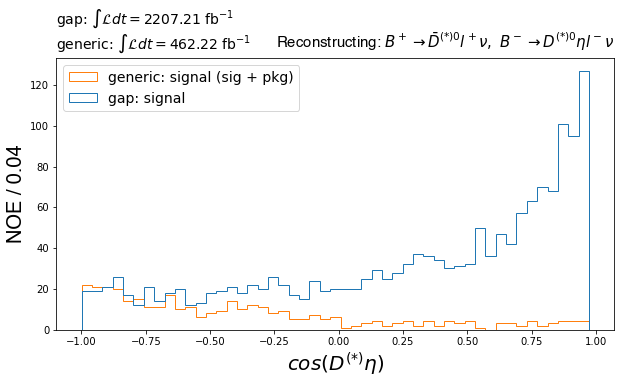

In [24]:
# gap sample
cos_Deta_sig = Deta_cos(eta_df_sig)
cos_Deta_sig = cos_Deta_sig[~np.isnan(cos_Deta_sig)]

# generic sample
cos_Deta_sigpkg_generic = Deta_cos(eta_df_sigpkg_generic)
cos_Deta_sigpkg_generic = cos_Deta_sigpkg_generic[~np.isnan(cos_Deta_sigpkg_generic)]

# plot the stacked histogram of the invariant mass of D+eta for sig and bkg
plt.figure(figsize=(10, 5))
bins = np.linspace(np.min(cos_Deta_sigpkg_generic), np.max(cos_Deta_sigpkg_generic), 50)
labels = ['gap: signal', 'generic: signal (sig + pkg)']
weights = [np.full_like(cos_Deta_sig, 1), np.full_like(cos_Deta_sigpkg_generic, 1)]
c, e, _ = plt.hist([cos_Deta_sig, cos_Deta_sigpkg_generic], weights=weights, bins=bins, histtype='step', label=labels)
plt.xlabel(r'$cos(D^{(*)}\eta)$', fontdict=form_label)
plt.ylabel(f'NOE / {e[1] - e[0]:.2f}', fontdict=form_label)
plt.title(r"Reconstructing: $B^+ \rightarrow \bar{D}^{(*)0}l^+\nu,\ B^-\rightarrow D^{(*)0}\eta l^-\nu$",
          loc='right', pad=10, fontdict=form_title)

text = 'gap: $\int \mathcal{L} dt = $' + f'{mclumi:.2f}' + r' fb$^{-1}$' + '\n'\
       + 'generic: $\int \mathcal{L} dt = $' + f'{mclumi_generic:.2f}' + r' fb$^{-1}$'
plt.annotate(text, xy=(0., 1.01), 
             fontsize=14,
             xycoords='axes fraction',
             horizontalalignment='left',
             verticalalignment='bottom')

plt.legend(fontsize=14, loc='upper left')
plt.show()

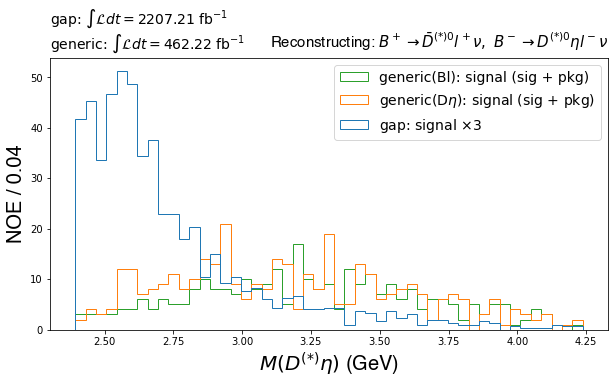

In [25]:
# only signal
# gap sample
# D + eta
m_Deta_sig = Deta_invM(eta_df_sig)
m_Deta_sig = m_Deta_sig[~np.isnan(m_Deta_sig)]

# generic sample
# D + eta
m_Deta_sigpkg_generic = Deta_invM(eta_df_sigpkg_generic)
m_Deta_sigpkg_generic = m_Deta_sigpkg_generic[~np.isnan(m_Deta_sigpkg_generic)]
# B - l
m_Bl_sigpkg_generic = Bl_invM(eta_df_sigpkg_generic)
m_Bl_sigpkg_generic = m_Bl_sigpkg_generic[~np.isnan(m_Bl_sigpkg_generic)]

# plot the stacked histogram of the invariant mass of D+eta for sig and bkg
plt.figure(figsize=(10, 5))
bins = np.linspace(np.min(m_Deta_sigpkg_generic), np.max(m_Deta_sigpkg_generic), 50)
labels = [r'gap: signal $\times 3$', r'generic(D$\eta$): signal (sig + pkg)', 'generic(Bl): signal (sig + pkg)']
weights = [np.full_like(m_Deta_sig, 1/3), np.full_like(m_Deta_sigpkg_generic, 1), np.full_like(m_Bl_sigpkg_generic, 1)]
c, e, _ = plt.hist([m_Deta_sig, m_Deta_sigpkg_generic, m_Bl_sigpkg_generic], weights=weights, bins=bins, histtype='step', label=labels)
plt.xlabel(r'$M(D^{(*)}\eta)$ (GeV)', fontdict=form_label)
plt.ylabel(f'NOE / {e[1] - e[0]:.2f}', fontdict=form_label)
plt.title(r"Reconstructing: $B^+ \rightarrow \bar{D}^{(*)0}l^+\nu,\ B^-\rightarrow D^{(*)0}\eta l^-\nu$",
          loc='right', pad=10, fontdict=form_title)

text = 'gap: $\int \mathcal{L} dt = $' + f'{mclumi:.2f}' + r' fb$^{-1}$' + '\n'\
       + 'generic: $\int \mathcal{L} dt = $' + f'{mclumi_generic:.2f}' + r' fb$^{-1}$'
plt.annotate(text, xy=(0., 1.01), 
             fontsize=14,
             xycoords='axes fraction',
             horizontalalignment='left',
             verticalalignment='bottom')

plt.legend(fontsize=14, loc='upper right')
plt.show()

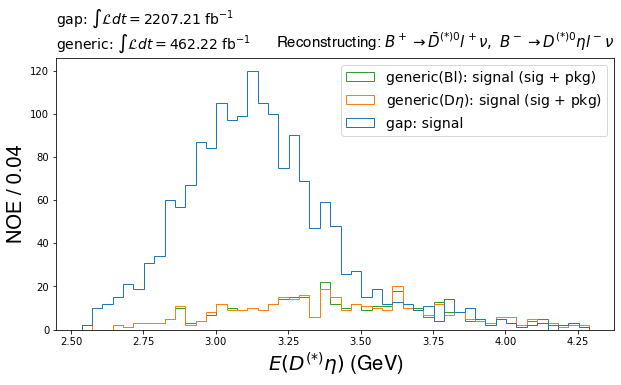

In [26]:
# only signal
# gap sample
# D + eta
E_Deta_sig = Deta_E(eta_df_sig)
E_Deta_sig = E_Deta_sig[~np.isnan(E_Deta_sig)]

# generic sample
# D + eta
E_Deta_sigpkg_generic = Deta_E(eta_df_sigpkg_generic)
E_Deta_sigpkg_generic = E_Deta_sigpkg_generic[~np.isnan(E_Deta_sigpkg_generic)]
# B - l
E_Bl_sigpkg_generic = Bl_E(eta_df_sigpkg_generic)
E_Bl_sigpkg_generic = E_Bl_sigpkg_generic[~np.isnan(E_Bl_sigpkg_generic)]


# plot the stacked histogram of the invariant mass of D+eta for sig and bkg
plt.figure(figsize=(10, 5))
bins = np.linspace(np.min(E_Deta_sigpkg_generic), np.max(E_Deta_sigpkg_generic), 50)
labels = [r'gap: signal', r'generic(D$\eta$): signal (sig + pkg)', 'generic(Bl): signal (sig + pkg)']
weights = [np.full_like(E_Deta_sig, 1), np.full_like(E_Deta_sigpkg_generic, 1), np.full_like(E_Bl_sigpkg_generic, 1)]
c, e, _ = plt.hist([E_Deta_sig, E_Deta_sigpkg_generic, E_Bl_sigpkg_generic], weights=weights, bins=bins, histtype='step', label=labels)
plt.xlabel(r'$E(D^{(*)}\eta)$ (GeV)', fontdict=form_label)
plt.ylabel(f'NOE / {e[1] - e[0]:.2f}', fontdict=form_label)
plt.title(r"Reconstructing: $B^+ \rightarrow \bar{D}^{(*)0}l^+\nu,\ B^-\rightarrow D^{(*)0}\eta l^-\nu$",
          loc='right', pad=10, fontdict=form_title)

text = 'gap: $\int \mathcal{L} dt = $' + f'{mclumi:.2f}' + r' fb$^{-1}$' + '\n'\
       + 'generic: $\int \mathcal{L} dt = $' + f'{mclumi_generic:.2f}' + r' fb$^{-1}$'
plt.annotate(text, xy=(0., 1.01), 
             fontsize=14,
             xycoords='axes fraction',
             horizontalalignment='left',
             verticalalignment='bottom')

plt.legend(fontsize=14, loc='upper right')
plt.show()

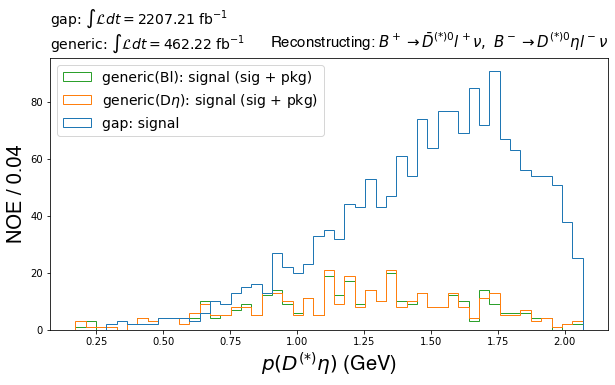

In [27]:
# only signal
# gap sample
# D + eta
p_Deta_sig = Deta_p(eta_df_sig)
p_Deta_sig = p_Deta_sig[~np.isnan(p_Deta_sig)]

# generic sample
# D + eta
p_Deta_sigpkg_generic = Deta_p(eta_df_sigpkg_generic)
p_Deta_sigpkg_generic = p_Deta_sigpkg_generic[~np.isnan(p_Deta_sigpkg_generic)]
# B - l
p_Bl_sigpkg_generic = Bl_p(eta_df_sigpkg_generic)
p_Bl_sigpkg_generic = p_Bl_sigpkg_generic[~np.isnan(p_Bl_sigpkg_generic)]


# plot the stacked histogram of the invariant mass of D+eta for sig and bkg
plt.figure(figsize=(10, 5))
bins = np.linspace(np.min(p_Deta_sigpkg_generic), np.max(p_Deta_sigpkg_generic), 50)
labels = ['gap: signal', r'generic(D$\eta$): signal (sig + pkg)', 'generic(Bl): signal (sig + pkg)']
weights = [np.full_like(p_Deta_sig, 1), np.full_like(p_Deta_sigpkg_generic, 1), np.full_like(p_Bl_sigpkg_generic, 1)]
c, e, _ = plt.hist([p_Deta_sig, p_Deta_sigpkg_generic, p_Bl_sigpkg_generic], weights=weights, bins=bins, histtype='step', label=labels)
plt.xlabel(r'$p(D^{(*)}\eta)$ (GeV)', fontdict=form_label)
plt.ylabel(f'NOE / {e[1] - e[0]:.2f}', fontdict=form_label)
plt.title(r"Reconstructing: $B^+ \rightarrow \bar{D}^{(*)0}l^+\nu,\ B^-\rightarrow D^{(*)0}\eta l^-\nu$",
          loc='right', pad=10, fontdict=form_title)

text = 'gap: $\int \mathcal{L} dt = $' + f'{mclumi:.2f}' + r' fb$^{-1}$' + '\n'\
       + 'generic: $\int \mathcal{L} dt = $' + f'{mclumi_generic:.2f}' + r' fb$^{-1}$'
plt.annotate(text, xy=(0., 1.01), 
             fontsize=14,
             xycoords='axes fraction',
             horizontalalignment='left',
             verticalalignment='bottom')

plt.legend(fontsize=14, loc='upper left')
plt.show()

## Comparing signal from gap mode and peaking background from generic mode

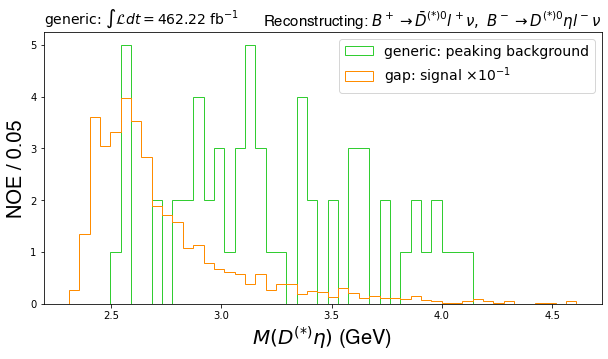

In [28]:
# gap sample
m_Deta_sig = Deta_invM(eta_df_sig)
m_Deta_sig = m_Deta_sig[~np.isnan(m_Deta_sig)]

# generic sample
m_Deta_pkg_generic = Deta_invM(eta_df_pkg_generic)
m_Deta_pkg_generic = m_Deta_pkg_generic[~np.isnan(m_Deta_pkg_generic)]

# plot the stacked histogram of the invariant mass of D+eta for sig and bkg
plt.figure(figsize=(10, 5))
bins = np.linspace(np.min(m_Deta_sig), np.max(m_Deta_sig), 50)
labels = [r'gap: signal $\times 10^{-1}$', 'generic: peaking background']
weights = [np.full_like(m_Deta_sig, scale*0.1), np.full_like(m_Deta_pkg_generic, 1)]
c, e, _ = plt.hist([m_Deta_sig, m_Deta_pkg_generic], weights=weights, bins=bins, histtype='step', label=labels, color=['darkorange', 'limegreen'])
plt.xlabel(r'$M(D^{(*)}\eta)$ (GeV)', fontdict=form_label)
plt.ylabel(f'NOE / {e[1] - e[0]:.2f}', fontdict=form_label)
plt.title(r"Reconstructing: $B^+ \rightarrow \bar{D}^{(*)0}l^+\nu,\ B^-\rightarrow D^{(*)0}\eta l^-\nu$",
          loc='right', pad=0, fontdict=form_title)

text = 'generic: $\int \mathcal{L} dt = $' + f'{mclumi_generic:.2f}' + r' fb$^{-1}$'
plt.annotate(text, xy=(0., 1.01), 
             fontsize=14,
             xycoords='axes fraction',
             horizontalalignment='left',
             verticalalignment='bottom')

plt.legend(fontsize=14, loc='upper right')
plt.show()

Text(0.0, 1.01, 'generic: $\\int \\mathcal{L} dt = $462.22 fb$^{-1}$')

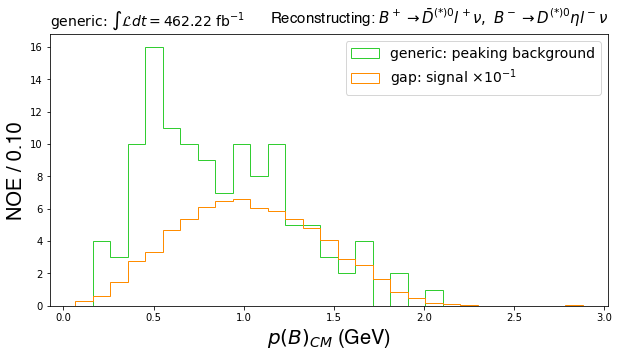

In [29]:
B_p_sig = pd.concat([eta_df_sig['B0_pCM'], eta_df_sig['B1_pCM']])
B_p_pkg_generic = pd.concat([eta_df_pkg_generic['B0_pCM'], eta_df_pkg_generic['B1_pCM']])

plt.figure(figsize=(10, 5))
weights = [np.full_like(B_p_sig, scale*0.1), np.full_like(B_p_pkg_generic, 1)]
bins = np.linspace(np.min(B_p_sig), np.max(B_p_sig), 30)
counts, bin_edges, patches = plt.hist([B_p_sig, B_p_pkg_generic], bins=bins, histtype='step', label=[r'gap: signal $\times 10^{-1}$', 'generic: peaking background'], color=['darkorange', 'limegreen'], weights=weights)
plt.title(r"Reconstructing: $B^+ \rightarrow \bar{D}^{(*)0}l^+\nu,\ B^-\rightarrow D^{(*)0}\eta l^-\nu$",
          loc='right', pad=10, fontdict=form_title)
plt.xlabel(r'$p(B)_{CM}$ (GeV)', fontdict=form_label)
plt.ylabel(f'NOE / {bin_edges[1] - bin_edges[0]:.2f}', fontdict=form_label)
plt.legend(fontsize=14, loc='upper right')

text = 'generic: $\int \mathcal{L} dt = $' + f'{mclumi_generic:.2f}' + r' fb$^{-1}$'
plt.annotate(text, xy=(0., 1.01), 
             fontsize=14,
             xycoords='axes fraction',
             horizontalalignment='left',
             verticalalignment='bottom')


Text(0.0, 1.01, 'generic: $\\int \\mathcal{L} dt = $462.22 fb$^{-1}$')

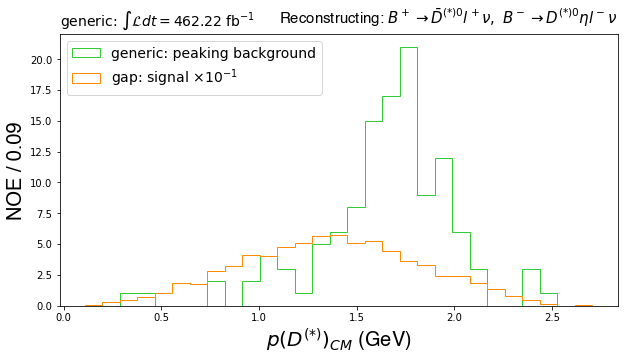

In [30]:
D_p_sig = pd.concat([eta_df_sig['D_B0_pCM'], eta_df_sig['D_B1_pCM']])
D_p_pkg_generic = pd.concat([eta_df_pkg_generic['D_B0_pCM'], eta_df_pkg_generic['D_B1_pCM']])

plt.figure(figsize=(10, 5))
weights = [np.full_like(D_p_sig, scale*0.1), np.full_like(D_p_pkg_generic, 1)]
bins = np.linspace(np.min(D_p_sig), np.max(D_p_sig), 30)
counts, bin_edges, patches = plt.hist([D_p_sig, D_p_pkg_generic], bins=bins, histtype='step', label=[r'gap: signal $\times 10^{-1}$', 'generic: peaking background'], color=['darkorange', 'limegreen'], weights=weights)
plt.title(r"Reconstructing: $B^+ \rightarrow \bar{D}^{(*)0}l^+\nu,\ B^-\rightarrow D^{(*)0}\eta l^-\nu$",
          loc='right', pad=10, fontdict=form_title)
plt.xlabel(r'$p(D^{(*)})_{CM}$ (GeV)', fontdict=form_label)
plt.ylabel(f'NOE / {bin_edges[1] - bin_edges[0]:.2f}', fontdict=form_label)
plt.legend(fontsize=14, loc='upper left')

text = 'generic: $\int \mathcal{L} dt = $' + f'{mclumi_generic:.2f}' + r' fb$^{-1}$'
plt.annotate(text, xy=(0., 1.01), 
             fontsize=14,
             xycoords='axes fraction',
             horizontalalignment='left',
             verticalalignment='bottom')


In [31]:
def plot(data_sig, data_pkg, variable=None, cos_Deta=False, invM_Deta=False, cos_leta=False, invM_leta=False, weights=None, xlabel='x_label', label=[r'gap: signal $\times 10^{-1}$', 'generic: peaking background'], loc_label='upper right', luminosity=mclumi_generic):
    # label example: [r'gap: signal $\times 10^{-1}$', 'generic: peaking background']
    # weights example: [np.full_like(B_p_sig, scale*0.1), np.full_like(B_p_pkg_generic, 1)]
    # xlabel example: r'$p(D^{(*)})_{CM}$ (GeV)'
    # loc_label example: 'upper left'
    
    if cos_Deta:
        # gap sample
        cos_sig = Deta_cos(data_sig)
        sig_gap = cos_sig[~np.isnan(cos_sig)]

        # generic sample
        cos_pkg = Deta_cos(data_pkg)
        pkg_generic = cos_pkg[~np.isnan(cos_pkg)]
        
    elif invM_Deta:
        # gap sample
        m_sig = Deta_invM(data_sig)
        sig_gap = m_sig[~np.isnan(m_sig)]

        # generic sample
        m_pkg = Deta_invM(data_pkg)
        pkg_generic = m_pkg[~np.isnan(m_pkg)]
        
    elif cos_leta:
        # gap sample
        cos_sig = leta_cos(data_sig)
        sig_gap = cos_sig[~np.isnan(cos_sig)]

        # generic sample
        cos_pkg = leta_cos(data_pkg)
        pkg_generic = cos_pkg[~np.isnan(cos_pkg)]
        
    elif invM_leta:
        # gap sample
        m_sig = leta_invM(data_sig)
        sig_gap = m_sig[~np.isnan(m_sig)]

        # generic sample
        m_pkg = leta_invM(data_pkg)
        pkg_generic = m_pkg[~np.isnan(m_pkg)]
    
    elif len(variable)==2:
        sig_gap = pd.concat([data_sig[variable[0]], data_sig[variable[1]]])
        pkg_generic = pd.concat([data_pkg[variable[0]], data_pkg[variable[1]]])
        
    else:
        sig_gap = data_sig[variable]
        pkg_generic = data_pkg[variable]
        
    plt.figure(figsize=(10, 5))
    weights_sig, weights_pkg = weights
    weights = [np.full_like(sig_gap, weights_sig), np.full_like(pkg_generic, weights_pkg)]
    bins = np.linspace(np.min(sig_gap), np.max(sig_gap), 30)
    
    counts, bin_edges, patches = plt.hist([sig_gap, pkg_generic], bins=bins, histtype='step', label=label, color=['darkorange', 'limegreen'], weights=weights)
    plt.title(r"Reconstructing: $B^+ \rightarrow \bar{D}^{(*)0}l^+\nu,\ B^-\rightarrow D^{(*)0}\eta l^-\nu$",
            loc='right', pad=10, fontdict=form_title)
    plt.xlabel(xlabel, fontdict=form_label)
    plt.ylabel(f'NOE / {bin_edges[1] - bin_edges[0]:.2f}', fontdict=form_label)
    plt.legend(fontsize=14, loc=loc_label)

    text = 'generic: $\int \mathcal{L} dt = $' + f'{luminosity:.2f}' + r' fb$^{-1}$'
    plt.annotate(text, xy=(0., 1.01), 
                fontsize=14,
                xycoords='axes fraction',
                horizontalalignment='left',
                verticalalignment='bottom')
    
    plt.show()

    
        

In [32]:
eta_df_sig

level_0  level_1  __experiment__  __run__  __event__  \
1      gen_charged       62            1003        0    1915421   
14     gen_charged      132            1003        0     920109   
17     gen_charged      175            1003        0      60752   
21     gen_charged      189            1003        0      61390   
22     gen_charged      228            1003        0     346332   
...            ...      ...             ...      ...        ...   
13493  gen_charged   104044            1003        0    2025782   
13496  gen_charged   104085            1003        0    2030746   
13498  gen_charged   104126            1003        0      99829   
13502  gen_charged   104311            1003        0    7862359   
13505  gen_charged   104361            1003        0    7677617   

       __production__  __candidate__  __ncandidates__  __weight__       Ecms  \
1               26236              0                2         1.0  10.579557   
14              26236              0                7         1.0  10.579557   
17              26236              0                4         1.0  10.579557   
21              26236              0                2         1.0  10.579557   
22              26236              0                3         1.0  10.579557   
...               ...            ...              ...         ...        ...   
13493           26243              0                5         1.0  10.579557   
13496           26243              2                7         1.0  10.579557   
13498           26243              0                3         1.0  10.579557   
13502           26243              0                9         1.0  10.579557   
13505           26243              0                1         1.0  10.579557   

       aBminusMode  aBplusMode  aB0Mode  aBbar0Mode  aDstminusMode  \
1          -1005.0    101001.0    -99.0       -99.0          -99.0   
14         -1022.0      1005.0    -99.0       -99.0          -99.0   
17         -1021.0      1025.0    -99.0       -99.0          -99.0   
21         -1001.0      1025.0    -99.0       -99.0          -99.0   
22       -101025.0    201002.0    -99.0       -99.0          -99.0   
...            ...         ...      ...         ...            ...   
13493      -1002.0      1004.0    -99.0       -99.0          -99.0   
13496      -1024.0      1004.0    -99.0       -99.0          -99.0   
13498      -1021.0      1024.0    -99.0       -99.0          -99.0   
13502    -101001.0      1004.0    -99.0       -99.0          -99.0   
13505    -301024.0      1022.0    -99.0       -99.0          -99.0   

       aDstplusMode  aDminusMode  aDplusMode  aD0Mode  aDbar0Mode       ECM  \
1             -99.0        -99.0       -99.0   1070.0   -101017.0  7.667319   
14            -99.0        -99.0       -99.0   1017.0     -1017.0  8.581628   
17            -99.0        -99.0       -99.0   1046.0     -1034.0  8.359264   
21            -99.0        -99.0       -99.0   1036.0     -1032.0  7.501486   
22            -99.0        -99.0       -99.0   1032.0     -1036.0  7.871210   
...             ...          ...         ...      ...         ...       ...   
13493         -99.0        -99.0       -99.0   1017.0     -1036.0  7.838388   
13496         -99.0        -99.0       -99.0   1036.0     -1017.0  8.677851   
13498         -99.0        -99.0       -99.0   1036.0     -1017.0  7.885343   
13502         -99.0        -99.0       -99.0   1032.0     -1036.0  9.296258   
13505         -99.0        -99.0       -99.0   1017.0     -1036.0  8.245593   

            pCM      InvM   cosThCM     phiCM     PDG  nROE_Ch  nROE_ECL  \
1      1.243035  7.565248  0.993015  2.507491  300553      0.0       3.0   
14     1.632780  8.425020 -0.877531  1.096092  300553      0.0       2.0   
17     1.974852  8.123624 -0.143885 -1.782773  300553      0.0       3.0   
21     1.082046  7.423745  0.195662 -1.965467  300553      0.0       3.0   
22     1.549978  7.719221  0.410920  1.841090  300553      0.0       3.0   

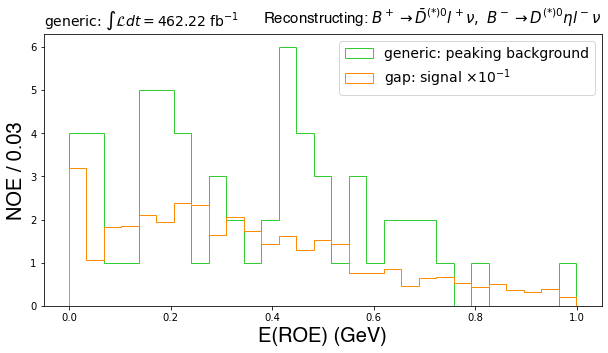

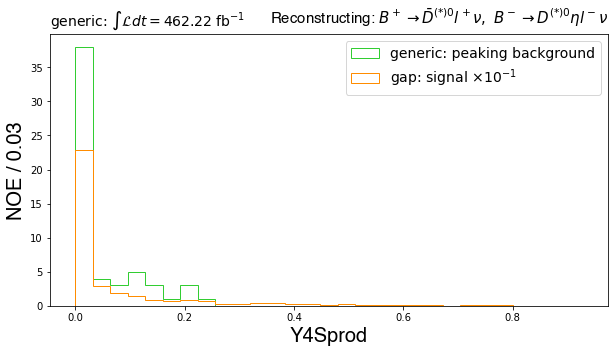

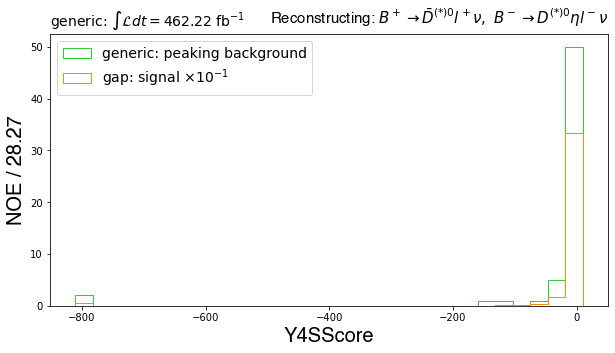

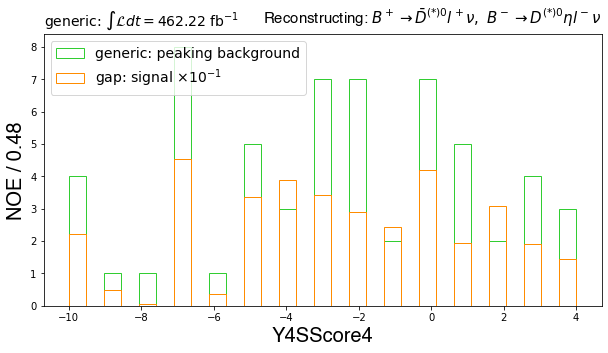

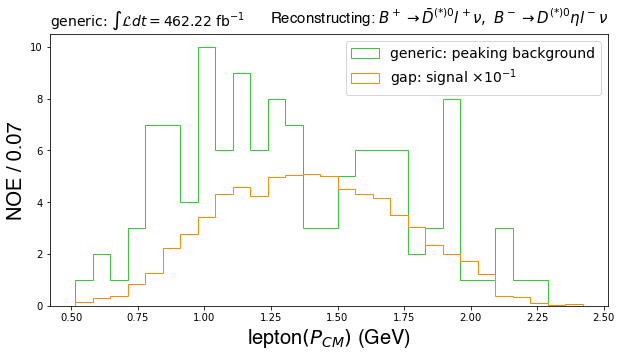

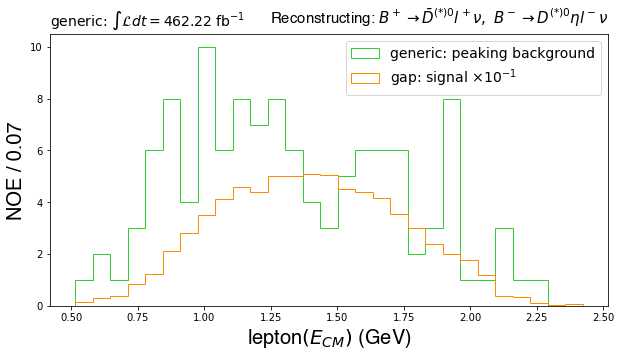

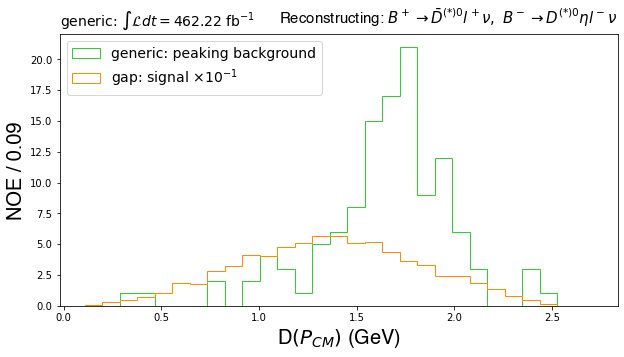

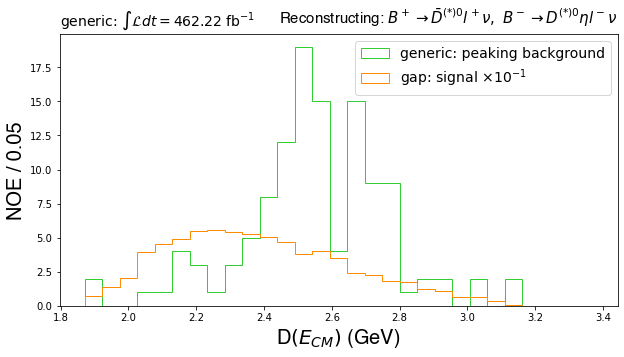

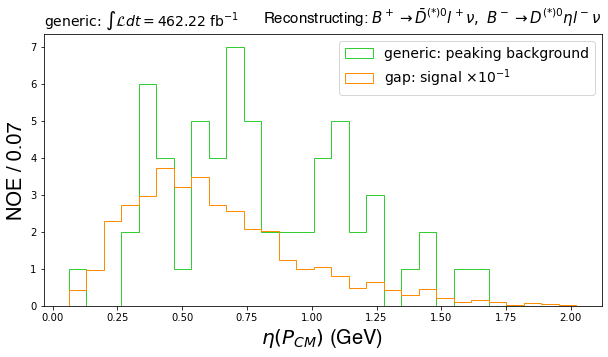

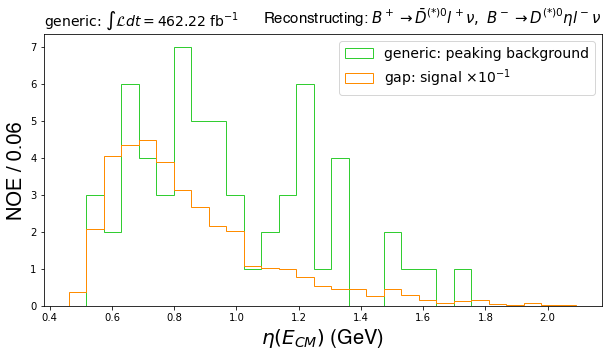

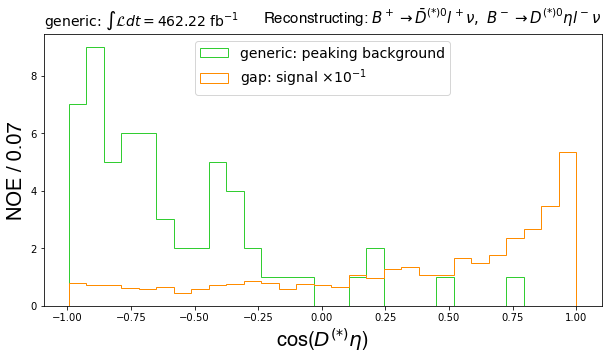

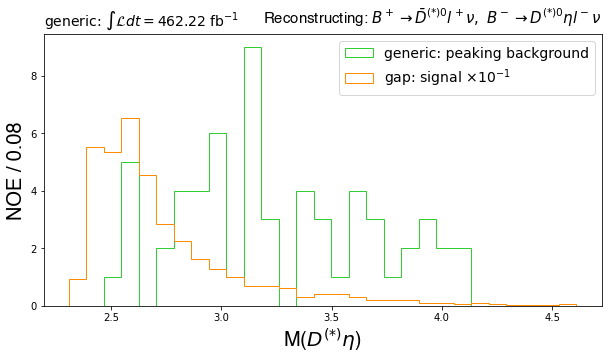

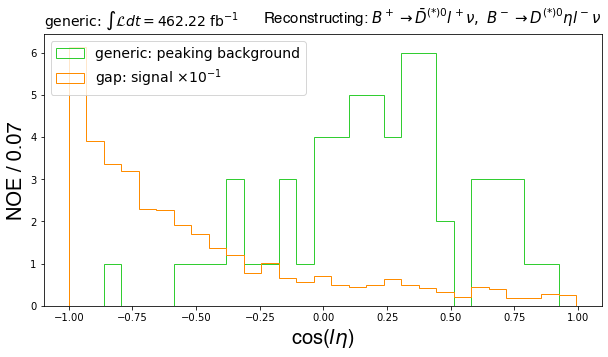

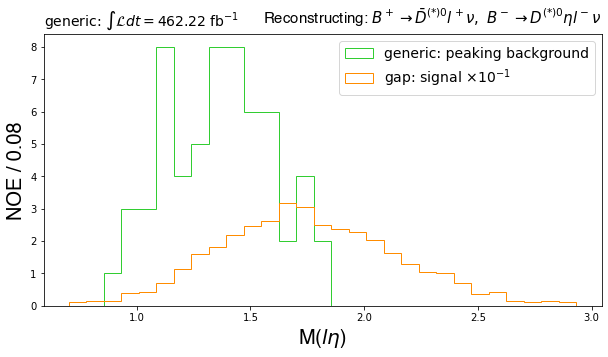

In [33]:
plot(eta_df_sig, eta_df_pkg_generic, variable='Eextra_ROE', weights=[scale*0.1, 1], xlabel='E(ROE) (GeV)')
plot(eta_df_sig, eta_df_pkg_generic, variable='Y4Sprod', weights=[scale*0.1, 1], xlabel='Y4Sprod')
plot(eta_df_sig, eta_df_pkg_generic, variable='Y4SScore', weights=[scale*0.1, 1], loc_label='upper left', xlabel='Y4SScore')
plot(eta_df_sig, eta_df_pkg_generic, variable='Y4SScore4', weights=[scale*0.1, 1], loc_label='upper left', xlabel='Y4SScore4')
plot(eta_df_sig, eta_df_pkg_generic, ['e_B0_pCM', 'e_B1_pCM'], weights=[scale*0.1, 1], loc_label='upper right', xlabel=r'lepton$(P_{CM})$ (GeV)')
plot(eta_df_sig, eta_df_pkg_generic, ['e_B0_ECM', 'e_B1_ECM'], weights=[scale*0.1, 1], loc_label='upper right', xlabel=r'lepton$(E_{CM})$ (GeV)')
plot(eta_df_sig, eta_df_pkg_generic, ['D_B0_pCM', 'D_B1_pCM'], weights=[scale*0.1, 1], loc_label='upper left', xlabel=r'D$(P_{CM})$ (GeV)')
plot(eta_df_sig, eta_df_pkg_generic, ['D_B0_ECM', 'D_B1_ECM'], weights=[scale*0.1, 1], loc_label='upper right', xlabel=r'D$(E_{CM})$ (GeV)')
plot(eta_df_sig, eta_df_pkg_generic, ['pi4_B0_pCM', 'pi4_B1_pCM'], weights=[scale*0.1, 1], loc_label='upper right', xlabel=r'$\eta (P_{CM})$ (GeV)')
plot(eta_df_sig, eta_df_pkg_generic, ['pi4_B0_ECM', 'pi4_B1_ECM'], weights=[scale*0.1, 1], loc_label='upper right', xlabel=r'$\eta (E_{CM})$ (GeV)')
plot(eta_df_sig, eta_df_pkg_generic, cos_Deta=True, weights=[scale*0.1, 1], loc_label='upper center', xlabel=r'cos($D^{(*)} \eta$)')
plot(eta_df_sig, eta_df_pkg_generic, invM_Deta=True, weights=[scale*0.1, 1], loc_label='upper right', xlabel=r'M($D^{(*)} \eta$)')
plot(eta_df_sig, eta_df_pkg_generic, cos_leta=True, weights=[scale*0.1, 1], loc_label='upper left', xlabel=r'cos($l \eta$)')
plot(eta_df_sig, eta_df_pkg_generic, invM_leta=True, weights=[scale*0.1, 1], loc_label='upper right', xlabel=r'M($l \eta$)')


# Multivariate Classification

In [219]:
from sklearn.model_selection import train_test_split

# To evaluate
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, plot_confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report
import seaborn as sns

In [21]:
# let's pick the columns of signal and peaking background that we want to use for the training
# signal
# I wanna pick the l in the B which has eta in the final state
l_B_pCM = np.concatenate([eta_df_sig.query('pi4_B0_isSignal==1')['e_B0_pCM'], eta_df_sig.query('pi4_B1_isSignal==1')['e_B1_pCM']])


cos_Deta = Deta_cos(eta_df_sig)
cos_Deta_column = cos_Deta[~np.isnan(cos_Deta)]

cos_leta = leta_cos(eta_df_sig)
cos_leta_column = cos_leta[~np.isnan(cos_leta)]

invM_Deta = Deta_invM(eta_df_sig)
invM_Deta_column = invM_Deta[~np.isnan(invM_Deta)]

invM_leta = leta_invM(eta_df_sig)
invM_leta_column = invM_leta[~np.isnan(invM_leta)]

data ={
    'l_B_pCM': l_B_pCM,
    'cos_Deta': cos_Deta_column,
    'cos_leta': cos_leta_column,
    'invM_Deta': invM_Deta_column,
    'invM_leta': invM_leta_column
}

df_sig = pd.DataFrame(data=data)
# target
df_sig['target'] = 1

# peaking background
# I wanna pick the l in the B which has eta in the final state
l_B_pCM = np.concatenate([eta_df_pkg_generic.query('pi4_B0_isSignal==1')['e_B0_pCM'], eta_df_pkg_generic.query('pi4_B1_isSignal==1')['e_B1_pCM']])

cos_Deta = Deta_cos(eta_df_pkg_generic)
cos_Deta_column = cos_Deta[~np.isnan(cos_Deta)]

cos_leta = leta_cos(eta_df_pkg_generic)
cos_leta_column = cos_leta[~np.isnan(cos_leta)]

invM_Deta = Deta_invM(eta_df_pkg_generic)
invM_Deta_column = invM_Deta[~np.isnan(invM_Deta)]

invM_leta = leta_invM(eta_df_pkg_generic)
invM_leta_column = invM_leta[~np.isnan(invM_leta)]

data ={
    'l_B_pCM': l_B_pCM,
    'cos_Deta': cos_Deta_column,
    'cos_leta': cos_leta_column,
    'invM_Deta': invM_Deta_column,
    'invM_leta': invM_leta_column
}

df_pkg = pd.DataFrame(data=data)
# target
df_pkg['target'] = 0

# concatenate the two dataframes
random_rows = df_sig.sample(n=363, random_state=42)
data = pd.concat([random_rows, df_pkg], axis=0)
# shuffle the dataframe
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data



l_B_pCM  cos_Deta  cos_leta  invM_Deta  invM_leta  target
0    0.936162  0.966319 -0.759992   2.565971   1.482124       1
1    1.484393  0.683677 -0.714461   2.639090   1.868549       1
2    0.978223  0.338290 -0.586326   2.700170   1.706208       1
3    1.195499  0.740184 -0.844976   2.590880   1.615812       0
4    0.749585 -0.905532  0.130999   4.005892   1.520746       0
..        ...       ...       ...        ...        ...     ...
418  0.998800  0.848249 -0.853876   2.418919   1.591656       1
419  1.415102  0.688187 -0.821013   2.398815   1.558843       1
420  0.841542  0.272880 -0.208908   2.687761   1.186091       1
421  1.415545 -0.471629  0.115168   3.052535   1.576532       1
422  1.550053  0.910302 -0.627946   2.526120   2.089218       1

[423 rows x 6 columns]

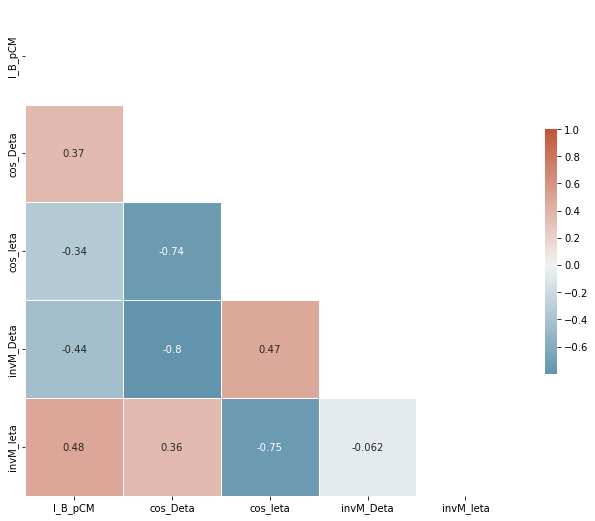

In [22]:
# Calculate the correlation matrix
corr = data.drop('target', axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()


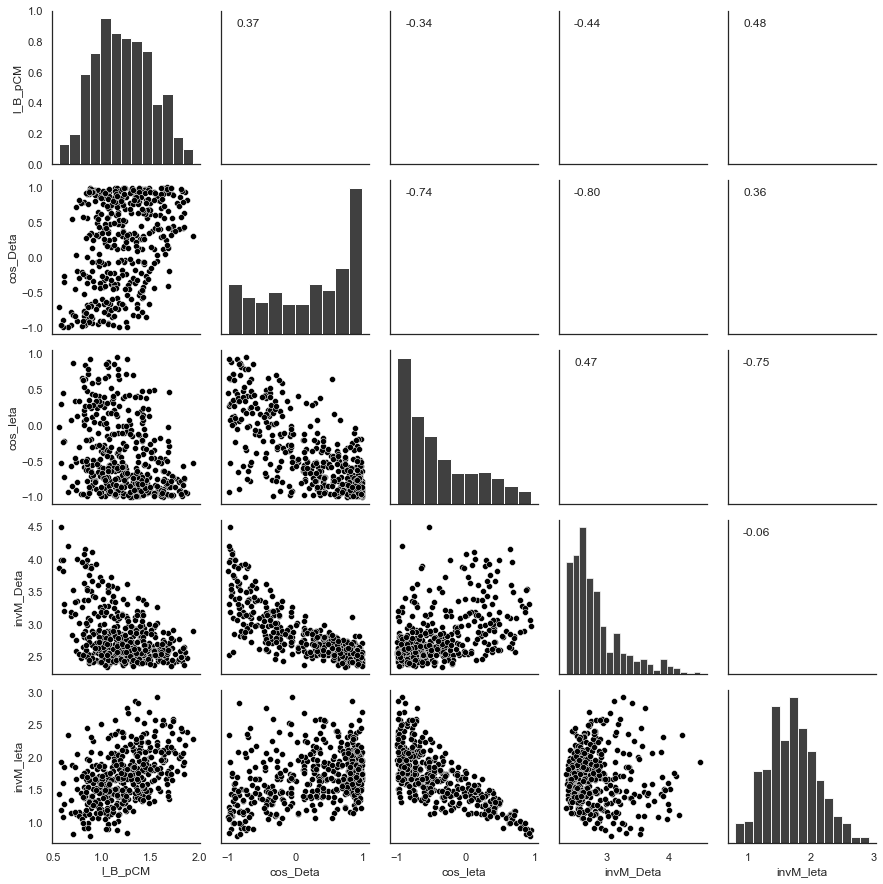

In [23]:
# Define a function to calculate the Pearson correlation coefficient
def corrfunc(x, y, **kws):
    r = np.corrcoef(x, y)[0, 1]  # Extract the correlation coefficient
    ax = plt.gca()  # Get the current axis
    ax.annotate(f"{r:.2f}", xy=(.1, .9), xycoords=ax.transAxes)  # Annotate the correlation coefficient


# Set the aesthetics for the plots
sns.set(style="white")

# Create an instance of the PairGrid class
grid = sns.PairGrid(data.drop(columns=['target']), diag_sharey=False)

# Map the plots to the lower, upper, and diagonal parts of the grid
# Lower triangle: scatter plots
grid = grid.map_lower(sns.scatterplot, color='black')
# Upper triangle: correlation coefficients
grid = grid.map_upper(corrfunc)
# Diagonal: histograms
grid = grid.map_diag(sns.histplot, kde=False, color='black', edgecolor="w")

plt.show()


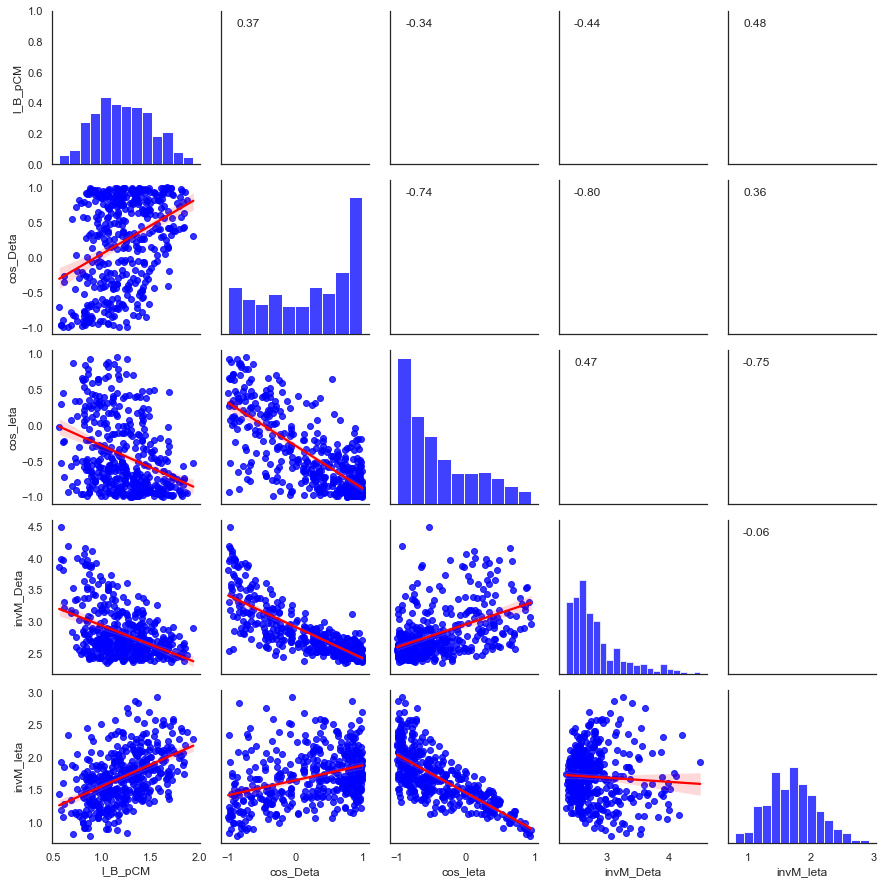

In [24]:
# Adjusting the code to add red regression lines to the scatter plots in the lower triangle
def corrfunc(x, y, **kws):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f"{r:.2f}", xy=(.1, .9), xycoords=ax.transAxes)

# Set the style for the plots
sns.set(style="white")

grid = sns.PairGrid(data.drop('target', axis=1))
grid = grid.map_lower(sns.regplot, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
grid = grid.map_upper(corrfunc)
grid = grid.map_diag(sns.histplot, kde=False, color='blue', edgecolor="w")
plt.show()


<AxesSubplot:>

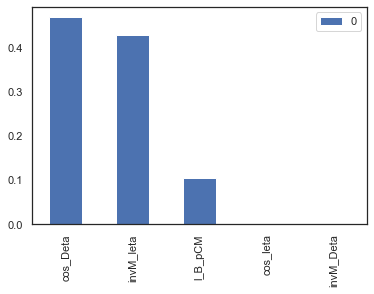

In [44]:
feature_importance.head(10).plot(kind='bar')

## Fisher Dsicriminant

In [25]:
len(data[data['target']==1])/len(data)

0.8581560283687943

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [112]:
X = data.drop('target', axis=1)
y = data['target']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# create the LDA model
lda = LDA(solver='lsqr', shrinkage='auto', priors=[0.15, 0.85], store_covariance=True)
lda = lda.fit(X_train, y_train)
print('Overal accuracy of the model', lda.score(X_train, y_train))

# make y_pred_dtc
y_pred_lda = lda.predict(X_test)
y_pred_prob_lda = lda.predict_proba(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_lda))

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_test, y_pred_lda))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, lda.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", roc_auc)


Overal accuracy of the model 0.8657243816254417
Accuracy: 0.9214285714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76        23
           1       0.95      0.96      0.95       117

    accuracy                           0.92       140
   macro avg       0.86      0.85      0.85       140
weighted avg       0.92      0.92      0.92       140

ROC-AUC Score: 0.9037532515793385


In [28]:
lda.get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': [0.15, 0.85],
 'shrinkage': 'auto',
 'solver': 'lsqr',
 'store_covariance': True,
 'tol': 0.0001}

In [355]:
# Define the confusion matrix on my own
def plot_confusion_matrix_threshold(y_true, y_pred_prob, thresh=0.5, normalize=False, title=None, cmap=plt.cm.Blues, classes=['pkg', 'sig']):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Compute confusion matrix
    y_pred = y_pred_prob[:, 1] > thresh
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix\n")
    else:
        print('Confusion matrix, without normalization\n')
    
    print(cm[0])
    
    fig, ax = plt.subplots(figsize=(8, 5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    
    # I wanna show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
          yticks=np.arange(cm.shape[0]),
          # ... and label them with the respective list entries
          xticklabels=classes, yticklabels=classes,
          title=title,
          ylabel='True label',
          xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
            rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.  # to make the threshhold half of the max of the confusion matrix
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="red" if cm[i, j] > min(cm[i]) else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization

[18  5]


<AxesSubplot:title={'center':'Confusion Matrix for LDA'}, xlabel='Predicted label', ylabel='True label'>

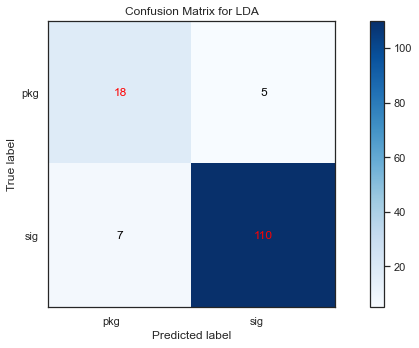

In [357]:
plot_confusion_matrix_threshold(y_test, y_pred_prob_lda, thresh=0.6, title='Confusion Matrix for LDA')

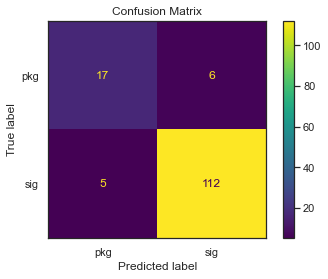

[1.99777415 0.99777415 0.98867487 0.98785702 0.97218719 0.96858908
 0.95132637 0.94897457 0.93283908 0.9326308  0.84314425 0.84144364
 0.61237477 0.5740001  0.50724338 0.30427715 0.28836303 0.20163013
 0.18640351 0.1739972  0.16754429 0.08851902 0.06895818 0.03973538]


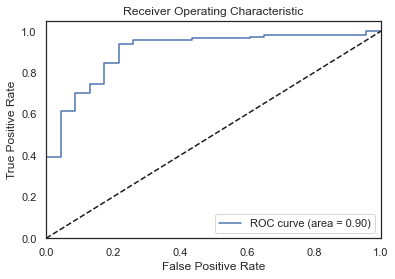

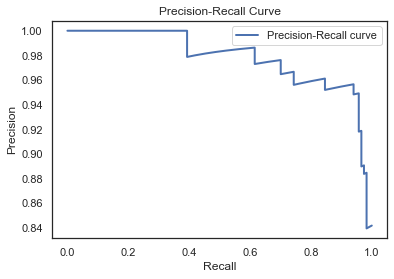

In [245]:
# Plotting the confusion matrix without the threshold, the default function from sklearn
plot_confusion_matrix(lda, X_test, y_test, display_labels=['pkg', 'sig'])
plt.title("Confusion Matrix")
plt.show()

# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, lda.predict_proba(X_test)[:, 1])
print(thresholds)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plotting Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, lda.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(recall, precision, lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()


In [42]:
feature_importance = pd.DataFrame(dtc.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

0
cos_Deta   0.467846
invM_leta  0.427204
l_B_pCM    0.104950
cos_leta   0.000000
invM_Deta  0.000000

In [43]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['cos_Deta', 'invM_leta', 'l_B_pCM']

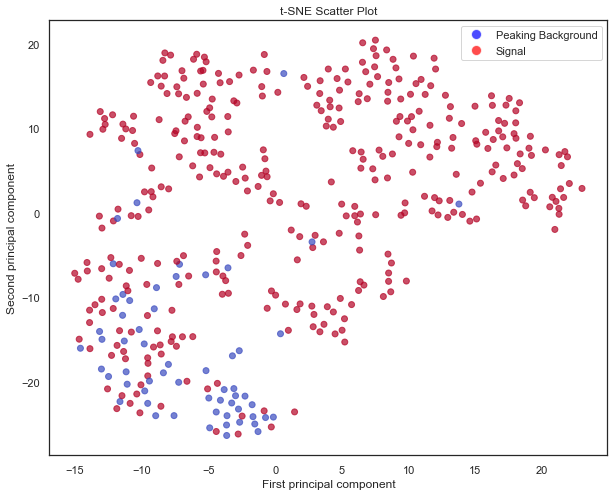

In [48]:
# plot t-sne
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

# Standardize the data
X_std = StandardScaler().fit_transform(X)

# Run the t-SNE algorithm
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_std)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.7, label=['pkg', 'sig'])
# Create custom handles for the legend
legend_handles = [Line2D([0], [0], marker='o', color='w', label='Peaking Background',
                          markersize=10, markerfacecolor='blue', alpha=0.7),
                  Line2D([0], [0], marker='o', color='w', label='Signal',
                          markersize=10, markerfacecolor='red', alpha=0.7)]

plt.legend(handles=legend_handles)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('t-SNE Scatter Plot')
plt.show()


In [ ]:
X_tsne[y==0, 0]

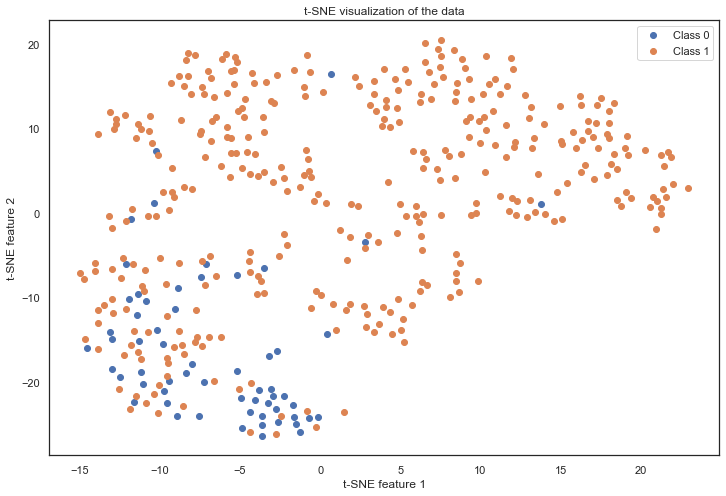

In [320]:
plt.figure(figsize=(12, 8))
for class_value in range(len(np.unique(y))):
    plt.scatter(X_tsne[y == class_value, 0], X_tsne[y == class_value, 1], label=f'Class {class_value}')
plt.legend()
plt.title('t-SNE visualization of the data')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


## Decision Tree

In [249]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [388]:
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# classifier
dtc = DTC(ccp_alpha=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, random_state=42)
dtc = dtc.fit(X_train, y_train)

# To predict
y_pred_dtc = dtc.predict(X_test)
y_pred_prob_dtc = dtc.predict_proba(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred_dtc))

# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtc))
print("Precision:", precision_score(y_test, y_pred_dtc))
print("Recall:", recall_score(y_test, y_pred_dtc))
print("F1 Score:", f1_score(y_test, y_pred_dtc))

# For ROC-AUC, ensure your model can estimate probabilities (has a predict_proba method)
roc_auc = roc_auc_score(y_test, dtc.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", roc_auc)



Accuracy: 0.9
Precision: 0.9478260869565217
Recall: 0.9316239316239316
F1 Score: 0.939655172413793
ROC-AUC Score: 0.8569305091044221


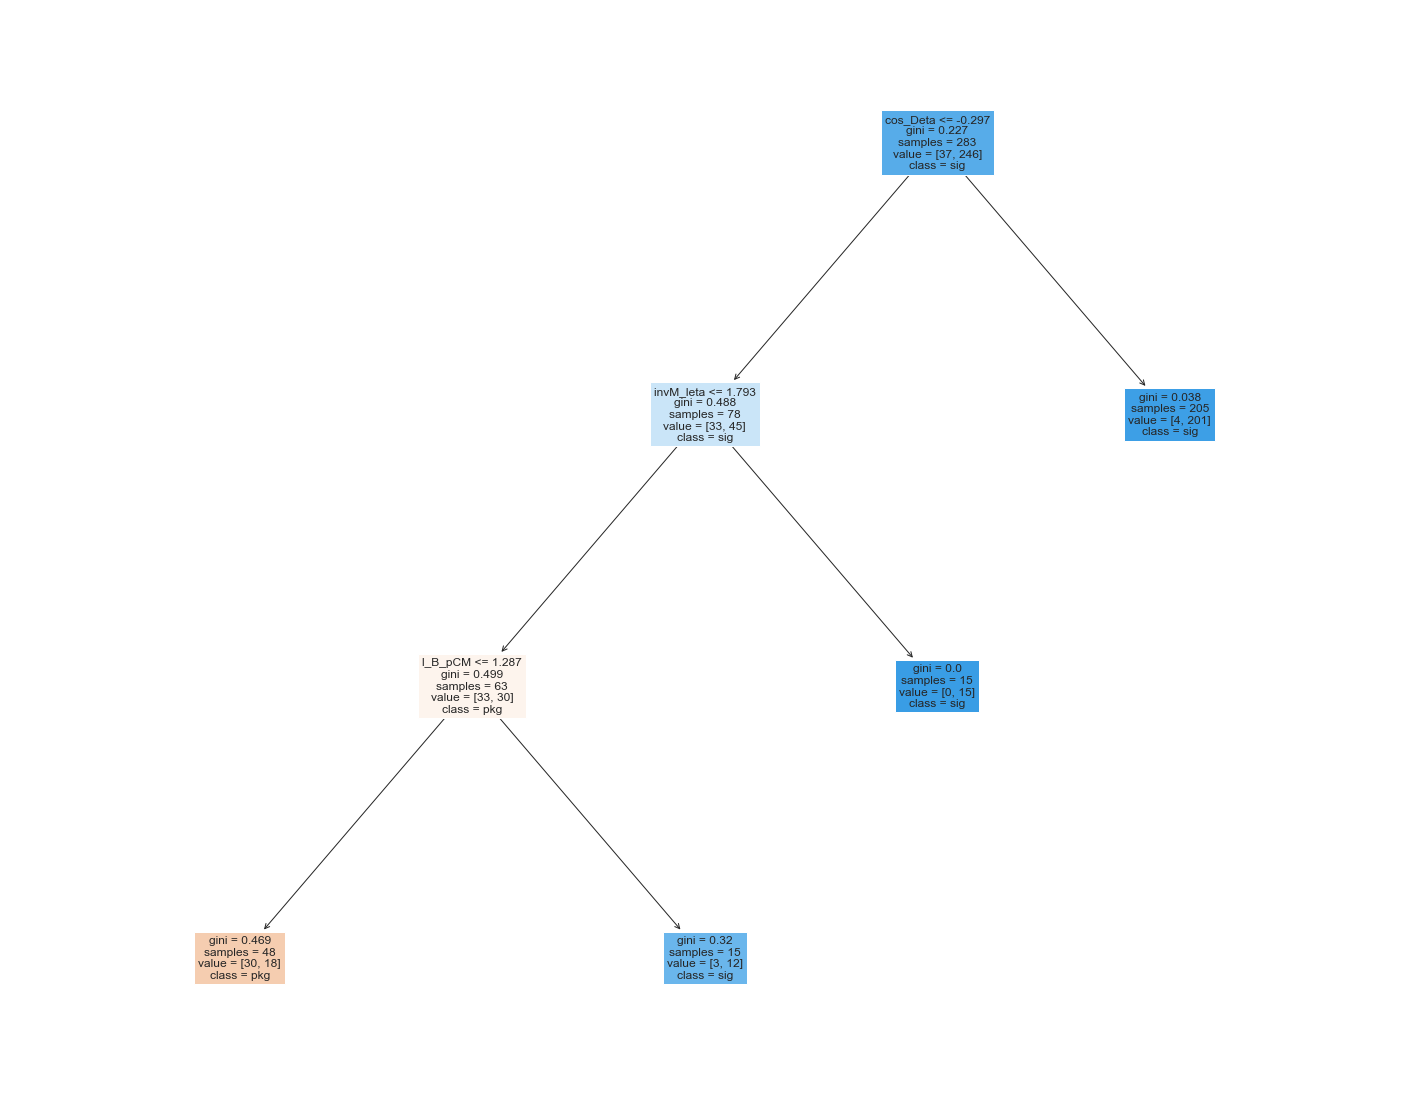

In [389]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=feature_names,  
                   class_names={0:'pkg', 1:'sig'},
                   filled=True,
                  fontsize=12)

In [395]:
dtc.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [203]:
print('len of y_pred_dtc: ', len(y_pred_dtc), '\nlen of y_test: ', len(y_test))

len of predictions:  140 
len of y_test:  140


In [204]:
np.array(y_test)

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1])

In [205]:
print(y_pred_dtc)

[1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1]


In [206]:
np.unique(y_pred_dtc, return_counts=True)

(array([0, 1]), array([ 20, 120]))

In [207]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([ 23, 117]))

In [208]:
dtc.predict_proba(X_test)

array([[0.0195122 , 0.9804878 ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.0195122 , 0.9804878 ],
       [0.0195122 , 0.9804878 ],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [0.0195122 , 0.9804878 ],
       [0.0195122 , 0.9804878 ],
       [0.0195122 , 0.9804878 ],
       [0.0195122 , 0.9804878 ],
       [0.        , 1.        ],
       [0.0195122 , 0.9804878 ],
       [0.0195122 , 0.9804878 ],
       [0.0195122 , 0.9804878 ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.0195122 , 0.9804878 ],
       [0.0195122 , 0.9804878 ],
       [0.0195122 , 0.9804878 ],
       [0.0195122 , 0.9804878 ],
       [0.0195122 , 0.9804878 ],
       [0.71428571, 0.28571429],
       [0.0195122 , 0.9804878 ],
       [0.0195122 , 0.9804878 ],
       [0.0195122 , 0.9804878 ],
       [0.0195122 , 0.9804878 ],
       [0.0195122 , 0.9804878 ],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [0.

In [209]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.65      0.57      0.60        23
           1       0.92      0.94      0.93       117

    accuracy                           0.88       140
   macro avg       0.78      0.75      0.77       140
weighted avg       0.87      0.88      0.88       140



In [40]:
dtc.feature_importances_

array([0.10495035, 0.46784557, 0.        , 0.        , 0.42720408])

In [41]:
feature_names = X.columns
feature_names

Index(['l_B_pCM', 'cos_Deta', 'cos_leta', 'invM_Deta', 'invM_leta'], dtype='object')

In [216]:
X_test.head()

l_B_pCM  cos_Deta  cos_leta  invM_Deta  invM_leta
145  1.566831  0.867469 -0.748408   2.496033   2.182005
280  0.891749 -0.702540 -0.636762   3.900376   2.313827
175  0.876259 -0.867032  0.929744   3.064374   0.786744
410  1.253671  0.216750 -0.003839   2.580319   1.406428
419  1.415102  0.688187 -0.821013   2.398815   1.558843

In [217]:
dtc.decision_path(X_test)

<140x11 sparse matrix of type '<class 'numpy.int64'>'
	with 372 stored elements in Compressed Sparse Row format>

In [256]:
sparse = dtc.decision_path(X_test).toarray()[:101]

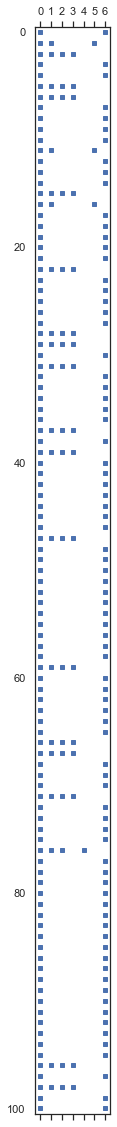

In [259]:
plt.figure(figsize=(20, 20))
plt.spy(sparse, markersize=4)

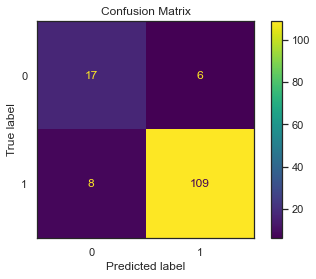

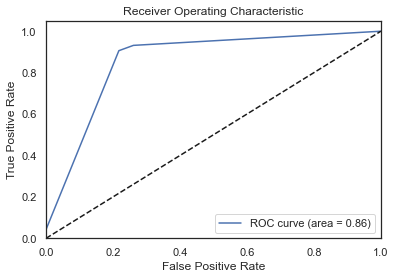

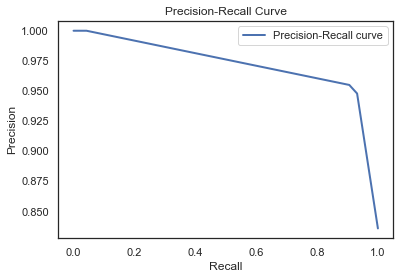

In [280]:
# Plotting the confusion matrix
plot_confusion_matrix(dtc, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, dtc.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plotting Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, dtc.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(recall, precision, lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()


## Comparing the two models LDA and DTC

Overal accuracy of the model LDA 0.8657243816254417
Overal accuracy of the model DTC 0.911660777385159


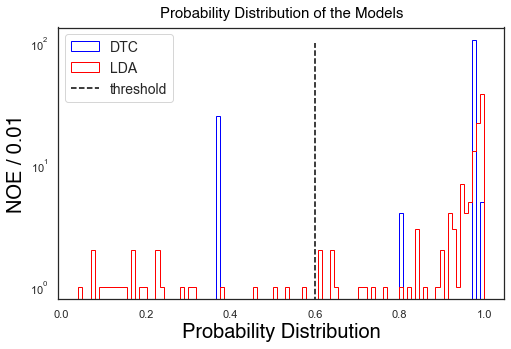

Confusion matrix, without normalization

[18  5]
Confusion matrix, without normalization

[17  6]


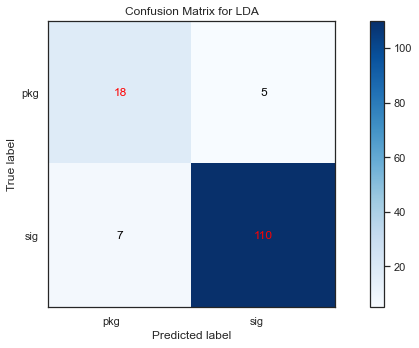

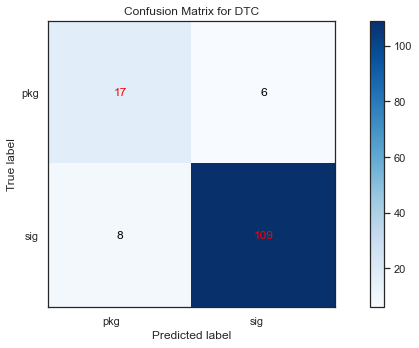

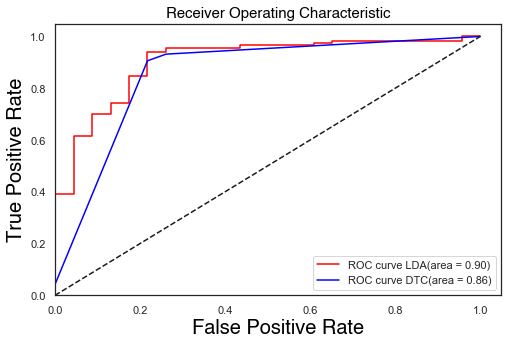

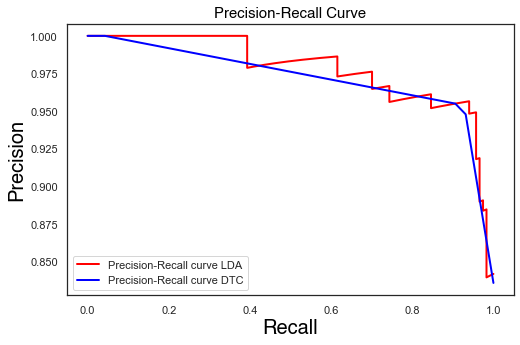

In [394]:
# I wanna check the precision of each model
print('Overal accuracy of the model LDA', lda.score(X_train, y_train))
print('Overal accuracy of the model DTC', dtc.score(X_train, y_train))

# plot step histogram of the probability distribution
plt.figure(figsize=(8, 5))
c, e, _ = plt.hist([y_pred_prob_lda[:,1], y_pred_prob_dtc[:,1]], bins=100, histtype='step', label=['LDA', 'DTC'], color=['red', 'blue'], log=True)
# plot a vertical line at the threshold
plt.vlines(0.6, 0, 1e2, color='black', linestyle='--', label='threshold')
plt.xlabel('Probability Distribution', fontdict=form_label)
plt.ylabel(f'NOE / {e[1] - e[0]:.2f}', fontdict=form_label)
plt.title(r"Probability Distribution of the Models", fontdict=form_title, loc='center', pad=10)

plt.legend(fontsize=14, loc='upper left')
plt.show()

# plot the confusion matrix for the two models
plot_confusion_matrix_threshold(y_test, y_pred_prob_lda, thresh=0.6, title='Confusion Matrix for LDA')
plot_confusion_matrix_threshold(y_test, y_pred_prob_dtc, thresh=0.6, title='Confusion Matrix for DTC')

# plot ROC curve for the two models
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, lda.predict_proba(X_test)[:, 1])
roc_auc_lda = auc(fpr_lda, tpr_lda)

fprr_dtc, tprr_dtc, thresholds_dtc = roc_curve(y_test, dtc.predict_proba(X_test)[:, 1])
roc_auc_dtc = auc(fprr_dtc, tprr_dtc)

plt.figure(figsize=(8, 5))
plt.plot(fpr_lda, tpr_lda, label='ROC curve LDA(area = %0.2f)' % roc_auc_lda, color='red')
plt.plot(fprr_dtc, tprr_dtc, label='ROC curve DTC(area = %0.2f)' % roc_auc_dtc, color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontdict=form_label)
plt.ylabel('True Positive Rate', fontdict=form_label)
plt.title('Receiver Operating Characteristic', fontdict=form_title)
plt.legend(loc="lower right")
plt.show()

# plot Precision-Recall curve for the two models
precision_lda, recall_lda, _ = precision_recall_curve(y_test, lda.predict_proba(X_test)[:, 1])
precision_dtc, recall_dtc, _ = precision_recall_curve(y_test, dtc.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 5))
plt.plot(recall_lda, precision_lda, lw=2, label='Precision-Recall curve LDA', color='red')
plt.plot(recall_dtc, precision_dtc, lw=2, label='Precision-Recall curve DTC', color='blue')
plt.xlabel('Recall', fontdict=form_label)
plt.ylabel('Precision', fontdict=form_label)
plt.title('Precision-Recall Curve', fontdict=form_title)
plt.legend(loc="lower left")
plt.show()
